#Presentación del grupo

* 
* 
*
*

# Fraudes con tarjeta de crédito

En el presente trabajo se realiza un análisis exhaustivo sobre un tema de gran relevancia en el mundo financiero: el fraude con tarjetas de crédito. Este fenómeno, que afecta tanto a consumidores como a instituciones financieras, ha cobrado importancia debido al aumento de las transacciones electrónicas y al uso generalizado de tarjetas de crédito.

# Presentación del problema


El fraude con tarjetas de crédito representa uno de los desafíos más significativos en el mundo financiero actual. Este fenómeno afecta tanto a consumidores como a instituciones financieras, provocando pérdidas económicas considerables y erosionando la confianza en los sistemas de pago electrónicos. Con el incremento de las transacciones en línea y el uso masivo de tarjetas de crédito, la necesidad de detectar y prevenir actividades fraudulentas se ha vuelto más crítica que nunca.

El problema radica en la sofisticación y adaptabilidad de los métodos de fraude, que evolucionan constantemente para evadir las medidas de seguridad existentes. Las instituciones financieras necesitan herramientas avanzadas que puedan analizar grandes volúmenes de datos en tiempo real y distinguir con precisión entre transacciones legítimas y fraudulentas.

# Objetivos del proyecto

El objetivo principal de este proyecto es desarrollar un sistema robusto y eficiente para la detección de fraudes en transacciones con tarjetas de crédito utilizando técnicas avanzadas de ciencia de datos y aprendizaje automático. Para lograr este objetivo, se plantean las siguientes metas específicas:

Realizar un análisis exploratorio de datos (EDA): Identificar patrones, tendencias y relaciones en el conjunto de datos de transacciones con tarjetas de crédito, tanto fraudulentas como legítimas, para comprender mejor las características que distinguen una de la otra.

Desarrollar y entrenar modelos de aprendizaje automático: Utilizar diversos algoritmos de machine learning para construir modelos predictivos capaces de detectar transacciones fraudulentas con alta precisión y eficiencia.

Evaluar el rendimiento de los modelos: Aplicar métricas de evaluación como la precisión, recall, F1-score, curva ROC y AUC-ROC para medir la efectividad de los modelos y seleccionar el más adecuado para la detección de fraudes.

Implementar técnicas de validación y robustez: Asegurar que los modelos desarrollados sean generalizables y robustos frente a nuevos datos mediante técnicas de validación cruzada y pruebas de robustez.

Proporcionar herramientas y recomendaciones prácticas: Desarrollar herramientas y generar conocimientos que puedan ser aplicados por instituciones financieras y otros actores relevantes para mejorar sus sistemas de detección de fraudes y proteger mejor a los consumidores.

Documentar el proceso y los hallazgos: Elaborar una documentación detallada del proceso de análisis, desarrollo y evaluación de los modelos, así como de los hallazgos clave, para facilitar la replicación y el uso de las metodologías en otros contextos de detección de fraudes.

# Origen del dataset a utilizar

Debido a que la mayoría de los Dataset de Argentina son incompletos,con pocos datos y en su mayoría privados, elegimos un Dataset Internacional, y simularemos que es un banco de Argentina.
Proporcionamos el link de nuestro Dataset: https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction

## Dataset credict card

Este conjunto de datos ofrece una variedad de atributos valiosos para un análisis exhaustivo. Contiene 555,719 instancias y 22 atributos, que incluyen tanto datos categóricos como numéricos. Es importante destacar que el conjunto de datos está completo, sin valores nulos. A continuación, se presenta un desglose de los atributos:

Trans_date_trans_time: Marca de tiempo de la transacción (fecha y hora).
Cc_num: Número único de identificación del cliente.
Merchant: Comerciante implicado en la transacción.
Category: Tipo de transacción (por ejemplo, personal, guardería).
Amt: Importe de la transacción.
First: Nombre del titular de la tarjeta.
Last: Apellido del titular de la tarjeta.
Gender: Sexo del titular de la tarjeta.
Street: Dirección del titular de la tarjeta.
City: Ciudad de residencia del titular de la tarjeta.
State: Estado de residencia del titular de la tarjeta.
Zip: Código postal del titular de la tarjeta.
Lat: Latitud de la ubicación del titular de la tarjeta.
Long: Longitud de la ubicación del titular de la tarjeta.
City_pop: Población de la ciudad del titular de la tarjeta.
Job: Cargo del titular de la tarjeta.
Dob: Fecha de nacimiento del titular de la tarjeta.
Trans_num: Identificador único de transacción.
Unix_time: Marca de tiempo de la transacción (formato Unix).
Merch_lat: Ubicación del comerciante (latitud).
Merch_long: Ubicación del comerciante (longitud).
Is_fraud: Indicador de transacción fraudulenta (1 = fraude, 0 = legítima), siendo esta la variable objetivo a efectos de clasificación.


Para el análisis de machine learning enfocado en la detección de fraude con tarjetas de crédito, se utilizarán las siguientes variables categóricas y la variable objetivo (target):

Variables categóricas:
Merchant: Comerciante implicado en la transacción.
Category: Tipo de transacción (por ejemplo, personal, guardería).
Gender: Sexo del titular de la tarjeta.
City: Ciudad de residencia del titular de la tarjeta.
State: Estado de residencia del titular de la tarjeta.
Job: Cargo del titular de la tarjeta.
Variable objetivo (target):
Is_fraud: Indicador de transacción fraudulenta (1 = fraude, 0 = legítima).
Estas variables categóricas serán codificadas de manera adecuada para ser utilizadas en los modelos de aprendizaje automático, y la variable objetivo se utilizará para entrenar y evaluar dichos modelos en la detección de fraudes.

In [5]:
# %pip install missingno

In [6]:
# %pip install pandas-profiling

In [7]:
# %pip install --upgrade pandas-profiling pydantic

In [8]:
# %pip install pandas-profiling==3.1.0 pydantic==1.10.2


In [9]:
# %pip install --upgrade scikit-learn


In [10]:
# %pip install --upgrade imbalanced-learn


In [11]:
# %pip install yellowbrick scikit-plot

In [12]:
# %pip install tabulate

In [13]:
# %pip install xgboost

# Cargamos las librerías a utilizar

In [14]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

# Visualización
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib import style
import missingno as msno

# Preprocesado y modelado
# ==============================================================================
from fancyimpute import IterativeImputer
from collections import Counter
import datetime
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler,  OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif as mu_clsf
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, recall_score, roc_curve, log_loss
from sklearn.inspection import permutation_importance
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import ConfusionMatrix
import scikitplot as skplt
import scipy

import warnings
warnings.filterwarnings('ignore')

# Algoritmos de Árboles de Decisión y Random Forest
# ==============================================================================
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Configuración de visualización
# ==============================================================================
%matplotlib inline
sns.color_palette("pastel")
sns.set_palette("pastel")
#sns.set_style("whitegrid")


# Importar las librerías necesarias
from tabulate import tabulate


# ---------- Other Libraries -------
# from dataprep.eda import create_report, plot, plot_correlation, plot_missing, plot_diff

## Lectura de nuestra base de datos

In [15]:
df_fraude = pd.read_csv('fraud_test.csv', sep=",")

In [16]:
df_fraude.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Visualizamos la cantidad de datos que contiene el archivo

In [17]:
df_fraude.shape

# Cuenta con 555710 filas y 23 columnas

(555719, 23)

In [18]:
# Obtener información general del conjunto de datos
print("\nInformación general del conjunto de datos:")
print(df_fraude.info())


Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float

## Datos nulos

In [19]:
# Se procede a verificar si hay datos nulos.
df_fraude.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

<AxesSubplot: >

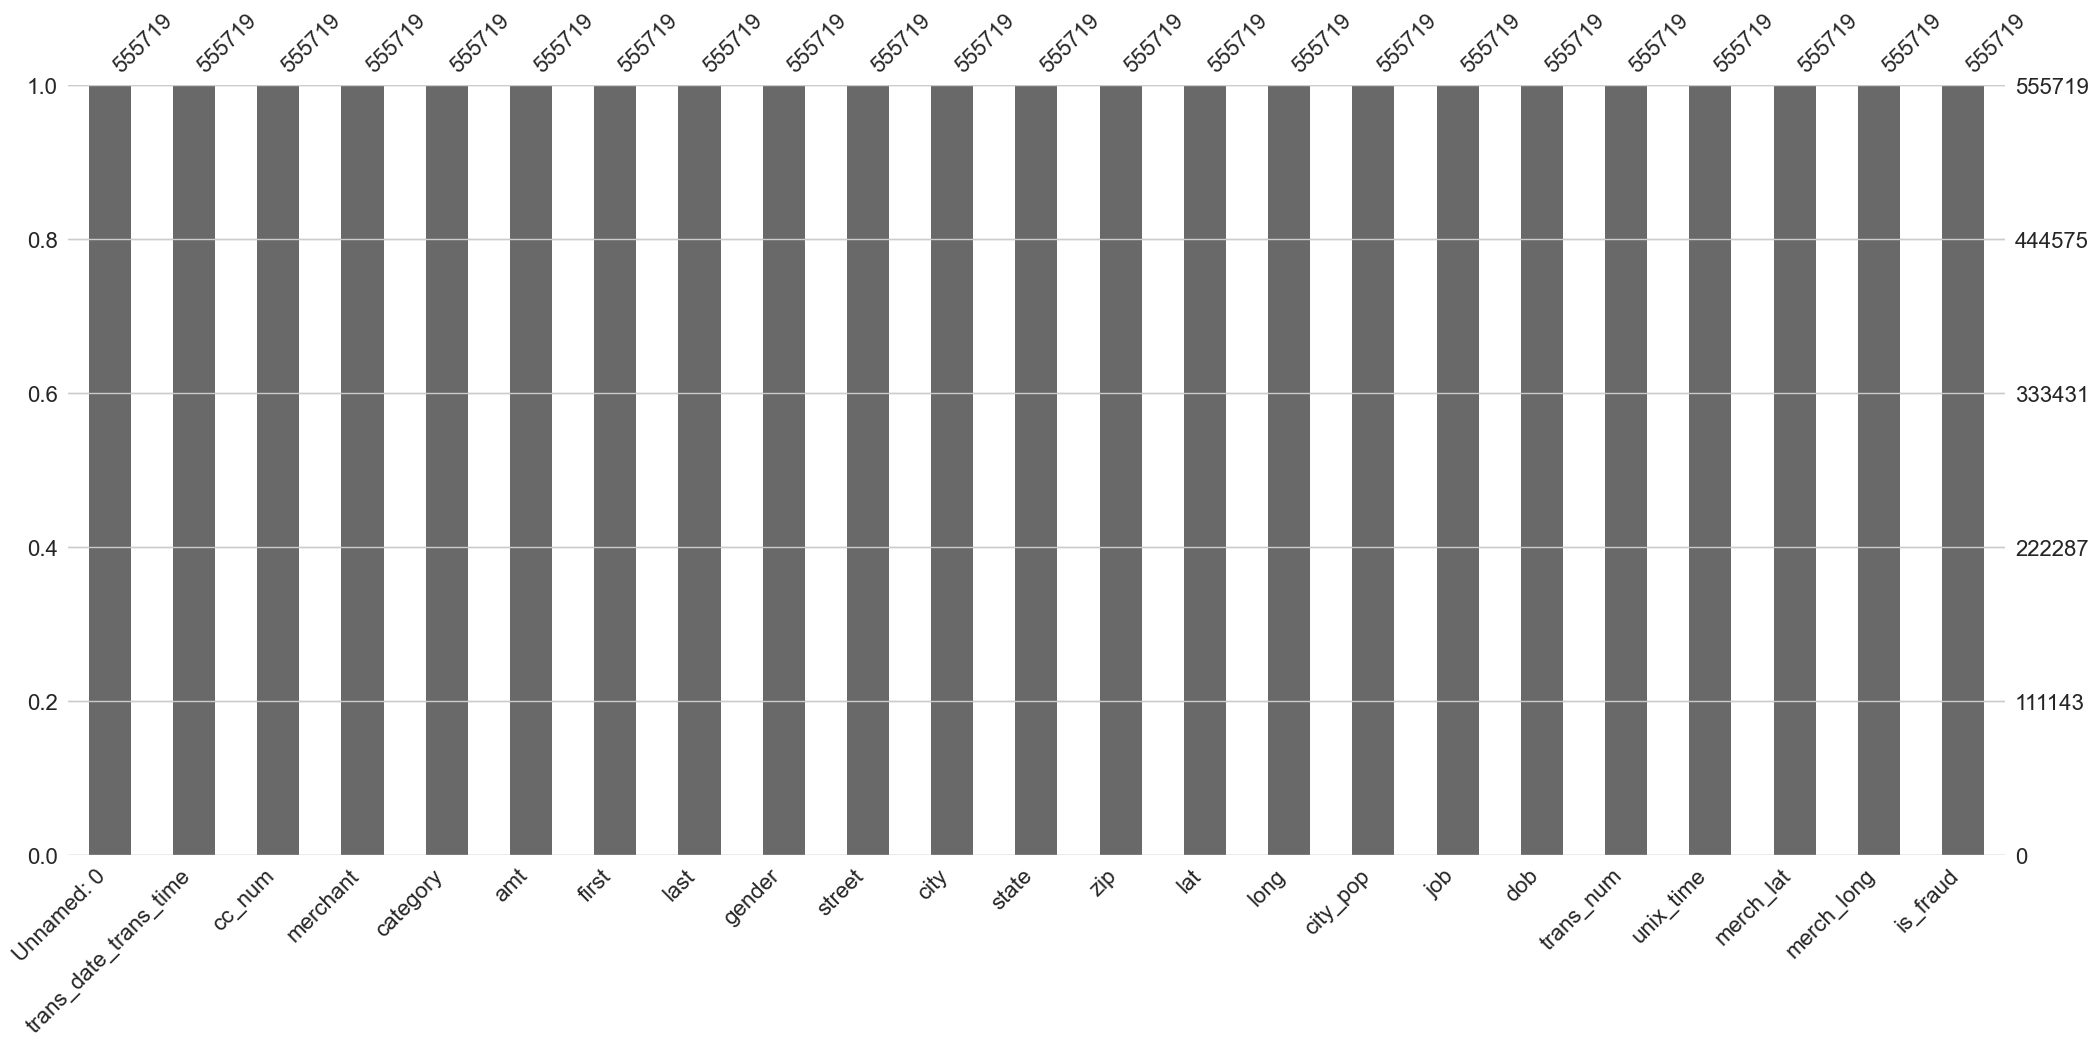

In [20]:
msno.bar(df_fraude)
# Visualizar la cantidad de valores no nulos por columna

In [21]:
print(len(df_fraude[df_fraude.duplicated()])) 
# verifico si hay duplicados

0


# Creamos un Dataframe con las variables seleccionadas y las renombramos

In [22]:
# Para facilitar nuestro dataset , se renombran las columnnas de ingles a español .
# Diccionario de mapeo de nombres en inglés a español
columnas_renombradas = {
    'Unnamed: 0': 'id',
    'trans_date_trans_time': 'fecha_transaccion',
    'cc_num': 'num_tarjeta',
    'merchant': 'comerciante',
    'category': 'categoria',
    'amt': 'monto',
    'first': 'nombre',
    'last': 'apellido',
    'gender': 'genero',
    'street': 'calle',
    'city': 'ciudad',
    'state': 'estado',
    'zip': 'codigo_postal',
    'lat': 'latitud',
    'long': 'longitud',
    'city_pop': 'poblacion_ciudad',
    'job': 'trabajo',
    'dob': 'fecha_nacimiento',
    'trans_num': 'num_transaccion',
    'unix_time': 'tiempo_unix',
    'merch_lat': 'latitud_comerciante',
    'merch_long': 'longitud_comerciante',
    'is_fraud': 'es_fraude'
}

# Renombrar las columnas
df_fraude.rename(columns=columnas_renombradas, inplace=True)

# Mostrar los nuevos nombres de las columnas
print("Columnas renombradas:", df_fraude.columns)

Columnas renombradas: Index(['id', 'fecha_transaccion', 'num_tarjeta', 'comerciante', 'categoria',
       'monto', 'nombre', 'apellido', 'genero', 'calle', 'ciudad', 'estado',
       'codigo_postal', 'latitud', 'longitud', 'poblacion_ciudad', 'trabajo',
       'fecha_nacimiento', 'num_transaccion', 'tiempo_unix',
       'latitud_comerciante', 'longitud_comerciante', 'es_fraude'],
      dtype='object')


## Análisis univariado

In [23]:
df_fraude.dtypes

id                        int64
fecha_transaccion        object
num_tarjeta             float64
comerciante              object
categoria                object
monto                   float64
nombre                   object
apellido                 object
genero                   object
calle                    object
ciudad                   object
estado                   object
codigo_postal             int64
latitud                 float64
longitud                float64
poblacion_ciudad          int64
trabajo                  object
fecha_nacimiento         object
num_transaccion          object
tiempo_unix               int64
latitud_comerciante     float64
longitud_comerciante    float64
es_fraude                 int64
dtype: object

In [24]:
df_fraude.describe().T


,count,mean,std,min,25%,50%,75%,max
id,555719.0,2.778590e+05,1.604224e+05,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
num_tarjeta,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800430e+14,3.521420e+15,4.635330e+15,4.992350e+18
monto,555719.0,6.939281e+01,1.567459e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
codigo_postal,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
latitud,555719.0,3.854325e+01,5.061336e+00,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
longitud,555719.0,-9.023133e+01,1.372178e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
poblacion_ciudad,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
tiempo_unix,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
latitud_comerciante,555719.0,3.854280e+01,5.095829e+00,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
longitud_comerciante,555719.0,-9.023138e+01,1.373307e+01,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01


In [25]:
df_fraude.describe(include='all')

,id,fecha_transaccion,num_tarjeta,comerciante,categoria,monto,nombre,apellido,genero,calle,...,latitud,longitud,poblacion_ciudad,trabajo,fecha_nacimiento,num_transaccion,tiempo_unix,latitud_comerciante,longitud_comerciante,es_fraude
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,226976,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,15/12/2020 21:26,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,23/03/1977,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,16,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800430e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521420e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635330e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000


In [26]:
df_fraude.tail()

,id,fecha_transaccion,num_tarjeta,comerciante,categoria,monto,nombre,apellido,genero,calle,...,latitud,longitud,poblacion_ciudad,trabajo,fecha_nacimiento,num_transaccion,tiempo_unix,latitud_comerciante,longitud_comerciante,es_fraude
555714,555714,31/12/2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,13/02/1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,31/12/2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27/12/1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,31/12/2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29/11/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31/12/2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15/12/1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,31/12/2020 23:59,4.170690e+15,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,10/05/1993,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [27]:
df_fraude['es_fraude'].value_counts()

es_fraude
0    553574
1      2145
Name: count, dtype: int64

In [28]:
df_fraude['trabajo'].value_counts()

trabajo
Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Estate manager/land agent         195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: count, Length: 478, dtype: int64

In [29]:
df_fraude['comerciante'].value_counts()

comerciante
fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: count, Length: 693, dtype: int64

In [30]:
df_fraude.nunique()

id                      555719
fecha_transaccion       226976
num_tarjeta                904
comerciante                693
categoria                   14
monto                    37256
nombre                     341
apellido                   471
genero                       2
calle                      924
ciudad                     849
estado                      50
codigo_postal              912
latitud                    910
longitud                   910
poblacion_ciudad           835
trabajo                    478
fecha_nacimiento           910
num_transaccion         555719
tiempo_unix             544760
latitud_comerciante     546490
longitud_comerciante    551770
es_fraude                    2
dtype: int64

In [31]:
df_fraude['comerciante'] = df_fraude['comerciante'].str.replace("fraud_","")


In [32]:
# Asegúrate de que la columna 'fecha_transaccion' sea de tipo string
df_fraude['fecha_transaccion'] = df_fraude['fecha_transaccion'].astype(str)

# Divide la columna en dos nuevas columnas: 'trans_date' y 'trans_time'
df_fraude[['trans_fecha', 'trans_hora']] = df_fraude['fecha_transaccion'].str.split(' ', expand=True)

# Verifica las primeras filas para asegurarte de que la operación se realizó correctamente
df_fraude.head(5)

,id,fecha_transaccion,num_tarjeta,comerciante,categoria,monto,nombre,apellido,genero,calle,...,poblacion_ciudad,trabajo,fecha_nacimiento,num_transaccion,tiempo_unix,latitud_comerciante,longitud_comerciante,es_fraude,trans_fecha,trans_hora
0,0,21/06/2020 12:14,2.291160e+15,Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,21/06/2020,12:14
1,1,21/06/2020 12:14,3.573030e+15,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,21/06/2020,12:14
2,2,21/06/2020 12:14,3.598220e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,21/06/2020,12:14
3,3,21/06/2020 12:15,3.591920e+15,Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,21/06/2020,12:15
4,4,21/06/2020 12:15,3.526830e+15,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,21/06/2020,12:15


In [33]:
# Asegúrate de que la columna 'fecha_transaccion' es de tipo datetime
df_fraude['fecha_transaccion'] = pd.to_datetime(df_fraude['fecha_transaccion'])

# Extrae la fecha y la hora de la columna 'fecha_transaccion'
df_fraude['trans_fecha'] = df_fraude['fecha_transaccion'].dt.date  # Extraer solo la fecha
df_fraude['trans_hora'] = df_fraude['fecha_transaccion'].dt.time  # Extraer solo la hora

# Agrupa por hora
df_fraude['trans_hora_agrupado'] = df_fraude['fecha_transaccion'].dt.hour  # Extraer la hora para agrupación

# Extrae el mes de la transacción
df_fraude['trans_mes'] = df_fraude['fecha_transaccion'].dt.to_period('M').astype("str")  # Extraer el mes en formato de periodo

# Extraer el nombre del día de la semana de 'fecha_transaccion'
df_fraude['trans_diaDeLaSemana'] = df_fraude['fecha_transaccion'].dt.day_name()  # Extraer el nombre del día de la semana

# Verifica las primeras filas para asegurarte de que la operación se realizó correctamente
df_fraude.head(5)


,id,fecha_transaccion,num_tarjeta,comerciante,categoria,monto,nombre,apellido,genero,calle,...,num_transaccion,tiempo_unix,latitud_comerciante,longitud_comerciante,es_fraude,trans_fecha,trans_hora,trans_hora_agrupado,trans_mes,trans_diaDeLaSemana
0,0,2020-06-21 12:14:00,2.291160e+15,Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:00,12,2020-06,Sunday
1,1,2020-06-21 12:14:00,3.573030e+15,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:00,12,2020-06,Sunday
2,2,2020-06-21 12:14:00,3.598220e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:00,12,2020-06,Sunday
3,3,2020-06-21 12:15:00,3.591920e+15,Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:15:00,12,2020-06,Sunday
4,4,2020-06-21 12:15:00,3.526830e+15,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:00,12,2020-06,Sunday


In [34]:
# Convertir la columna 'fecha_nacimiento' a tipo datetime
df_fraude['fecha_nacimiento'] = pd.to_datetime(df_fraude['fecha_nacimiento'])

# calcular la edad
df_fraude['edad'] = (2020  - df_fraude['fecha_nacimiento'].dt.year)

In [35]:
df_fraude['edad'].unique()

array([52, 30, 50, 33, 65, 29, 69, 48, 47, 64, 24, 44, 43, 83, 49, 32, 28,
       23, 35, 63, 72, 90, 46, 56, 62, 25, 40, 51, 45, 59, 77, 41, 34, 26,
       91, 86, 27, 21, 38, 22, 36, 42, 31, 53, 20, 71, 82, 54, 55, 75, 37,
       16, 68, 39, 70, 17, 66, 60, 79, 58, 74, 67, 96, 57, 19, 61, 94, 73,
       84, 85, 81, 78, 15, 76, 89, 93, 80, 92, 87, 88, 18])

In [36]:
print("edad minima", df_fraude['edad'].min())
print("edad maxima", df_fraude['edad'].max())

edad minima 15
edad maxima 96


In [37]:
def aplicar_grupo_edad(edad):
    if edad <= 18:
        return 'Adolescente'
    elif edad <= 25:
        return 'Joven Adulto'
    elif edad <= 64:
        return 'Adulto'
    else:
        return 'Anciano'


df_fraude['grupo_edad'] = df_fraude['edad'].apply(aplicar_grupo_edad)
df_fraude['no_fraude']= df_fraude['es_fraude'].apply(lambda x: 1 if x == 0 else 0)

df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    555719 non-null  int64         
 1   fecha_transaccion     555719 non-null  datetime64[ns]
 2   num_tarjeta           555719 non-null  float64       
 3   comerciante           555719 non-null  object        
 4   categoria             555719 non-null  object        
 5   monto                 555719 non-null  float64       
 6   nombre                555719 non-null  object        
 7   apellido              555719 non-null  object        
 8   genero                555719 non-null  object        
 9   calle                 555719 non-null  object        
 10  ciudad                555719 non-null  object        
 11  estado                555719 non-null  object        
 12  codigo_postal         555719 non-null  int64         
 13 

In [38]:
df_fraude = df_fraude.drop(['calle', 'codigo_postal', 'poblacion_ciudad', 'num_transaccion', 'tiempo_unix', 'latitud_comerciante', 'longitud_comerciante','nombre','apellido','fecha_nacimiento','latitud','longitud'], axis=1)

In [39]:
df_fraude.sample()

,id,fecha_transaccion,num_tarjeta,comerciante,categoria,monto,genero,ciudad,estado,trabajo,es_fraude,trans_fecha,trans_hora,trans_hora_agrupado,trans_mes,trans_diaDeLaSemana,edad,grupo_edad,no_fraude
47206,47206,2020-07-07 08:07:00,2.131420e+14,Rodriguez Group,gas_transport,56.26,F,Florence,MS,Fine artist,0,2020-07-07,08:07:00,8,2020-07,Tuesday,36,Adulto,1


In [40]:
def annotate_bar(ax, custom_y_func, font_size = 14):
    for p in ax.patches:
        # Calcular la anotacion
        value = str(round(p.get_height(), 1))
        x = (p.get_x() + p.get_width() / 2) * 0.99
        y = ((p.get_y() + p.get_height() / 2) * 0.99)
        
        # Aplicar la función personalizada para ajustar la posición vertical
        y = custom_y_func(y)
        ax.annotate(
            value,
            (x,y),
            color="black",
            size= font_size, ha='center', va='center'
        )

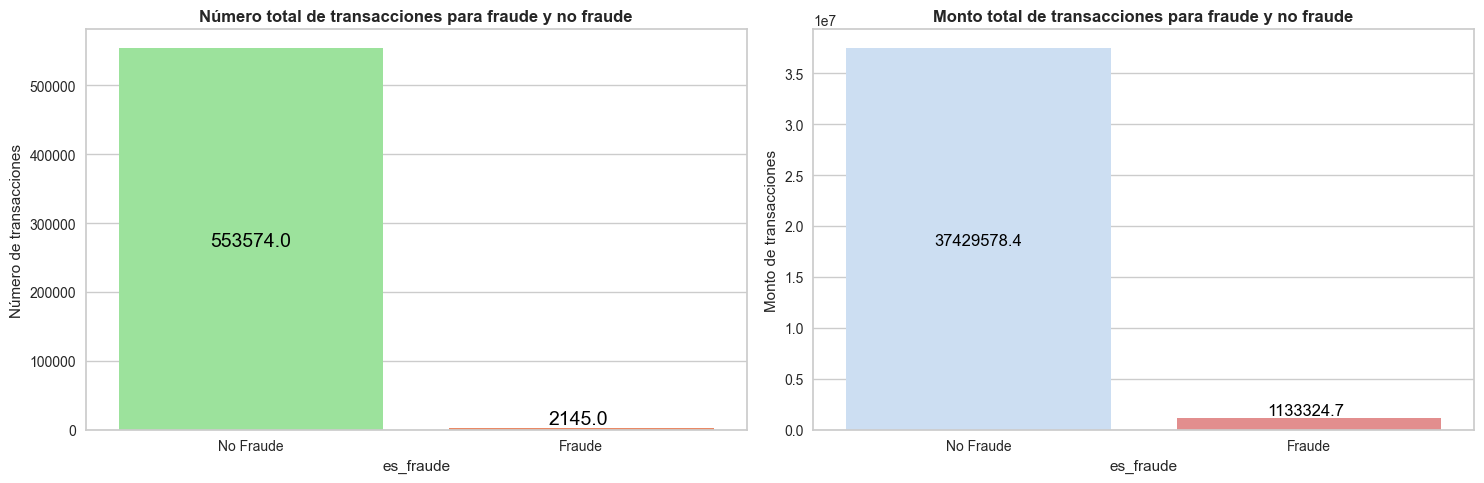

In [41]:
# Crear la figura y los subplots
fig = plt.figure(figsize=(15, 5))

# Primer gráfico: Número total de transacciones para fraude y no fraude
plt.subplot(1, 2, 1)

# Preparar los datos
df_fraud_count = df_fraude['es_fraude'].apply(lambda x: "Fraude" if x == 1 else 'No Fraude').value_counts().reset_index()
df_fraud_count.columns = ['es_fraude', 'monto']  # Renombrar columnas

# Crear el gráfico de barras con diferentes colores
palette = {'Fraude': 'coral', 'No Fraude': 'lightgreen'}  # Definir colores para cada categoría
ax = sns.barplot(data=df_fraud_count, x='es_fraude', y='monto', palette=palette)

# Añadir anotaciones
annotate_bar(ax, lambda y: 15000 if y < 10000 else y, font_size=14)

# Configurar el gráfico
plt.title('Número total de transacciones para fraude y no fraude', fontsize=12, fontweight='bold')
plt.ylabel("Número de transacciones")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)



# Segundo gráfico: Monto total de transacciones para fraude y no fraude
plt.subplot(1, 2, 2)

# Preparar los datos
df_fraud_amount = df_fraude.groupby('es_fraude')['monto'].sum().reset_index()
df_fraud_amount['es_fraude'] = df_fraud_amount['es_fraude'].apply(lambda x: "Fraude" if x == 1 else 'No Fraude')

# Crear el gráfico de barras con diferentes colores
palette = {'Fraude': 'LightCoral', 'No Fraude': '#c6def8'}  # Definir colores para cada categoría
ax = sns.barplot(data=df_fraud_amount, x='es_fraude', y='monto', palette=palette)

# Añadir anotaciones
annotate_bar(ax, lambda y: 1900000 if y < 1200000 else y, font_size=12)

# Configurar el gráfico
plt.title('Monto total de transacciones para fraude y no fraude', fontsize=12, fontweight='bold')
plt.ylabel("Monto de transacciones")
ax.set_xticklabels(['No Fraude', 'Fraude'], rotation=0)

# Mostrar la figura
plt.tight_layout()
plt.show()

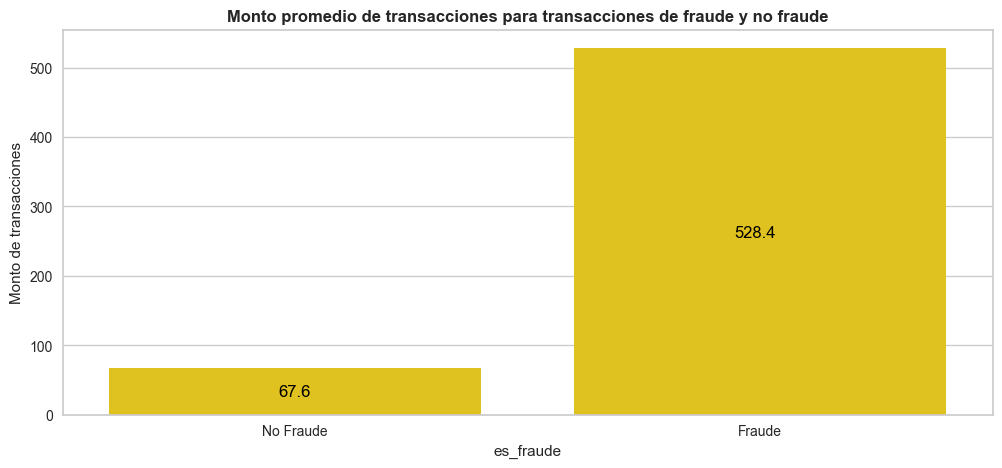

In [42]:
# Calcular el monto promedio de transacciones para transacciones fraudulentas y no fraudulentas
fig = plt.figure(figsize=(12, 5))  # Configurar el tamaño de la figura
avg_amt = df_fraude.groupby('es_fraude')['monto'].mean().reset_index()  # Agrupar por 'es_fraude' y calcular el promedio del monto de transacciones

# Crear el gráfico de barras usando Seaborn
ax = sns.barplot(data=avg_amt, x='es_fraude', y='monto', color='Gold')  
# Añadir anotaciones a las barras para mostrar el monto promedio
annotate_bar(ax, lambda y: y, font_size=12)

# Configurar el título y las etiquetas del gráfico
plt.title('Monto promedio de transacciones para transacciones de fraude y no fraude', fontsize=12, fontweight='bold')
plt.ylabel("Monto de transacciones")
ax.set_xticklabels(['No Fraude', 'Fraude'], rotation=0)  # Configurar las etiquetas del eje x

# Mostrar el gráfico
plt.show()


In [43]:
# Graficando la visión general del conjunto de datos por mes, género y categoría
columns = ['trans_mes','trans_diaDeLaSemana','genero','categoria','edad','grupo_edad']
columns_name = ['mes','día de la semana','género','categoria','edad','grupo de edad']
name = ['No Fraude','Fraude']

# Agregar columna de fraude
df_fraude['fraud'] = df_fraude['es_fraude'].apply(lambda x: "Fraud" if x == 1 else 'Not Fraud')

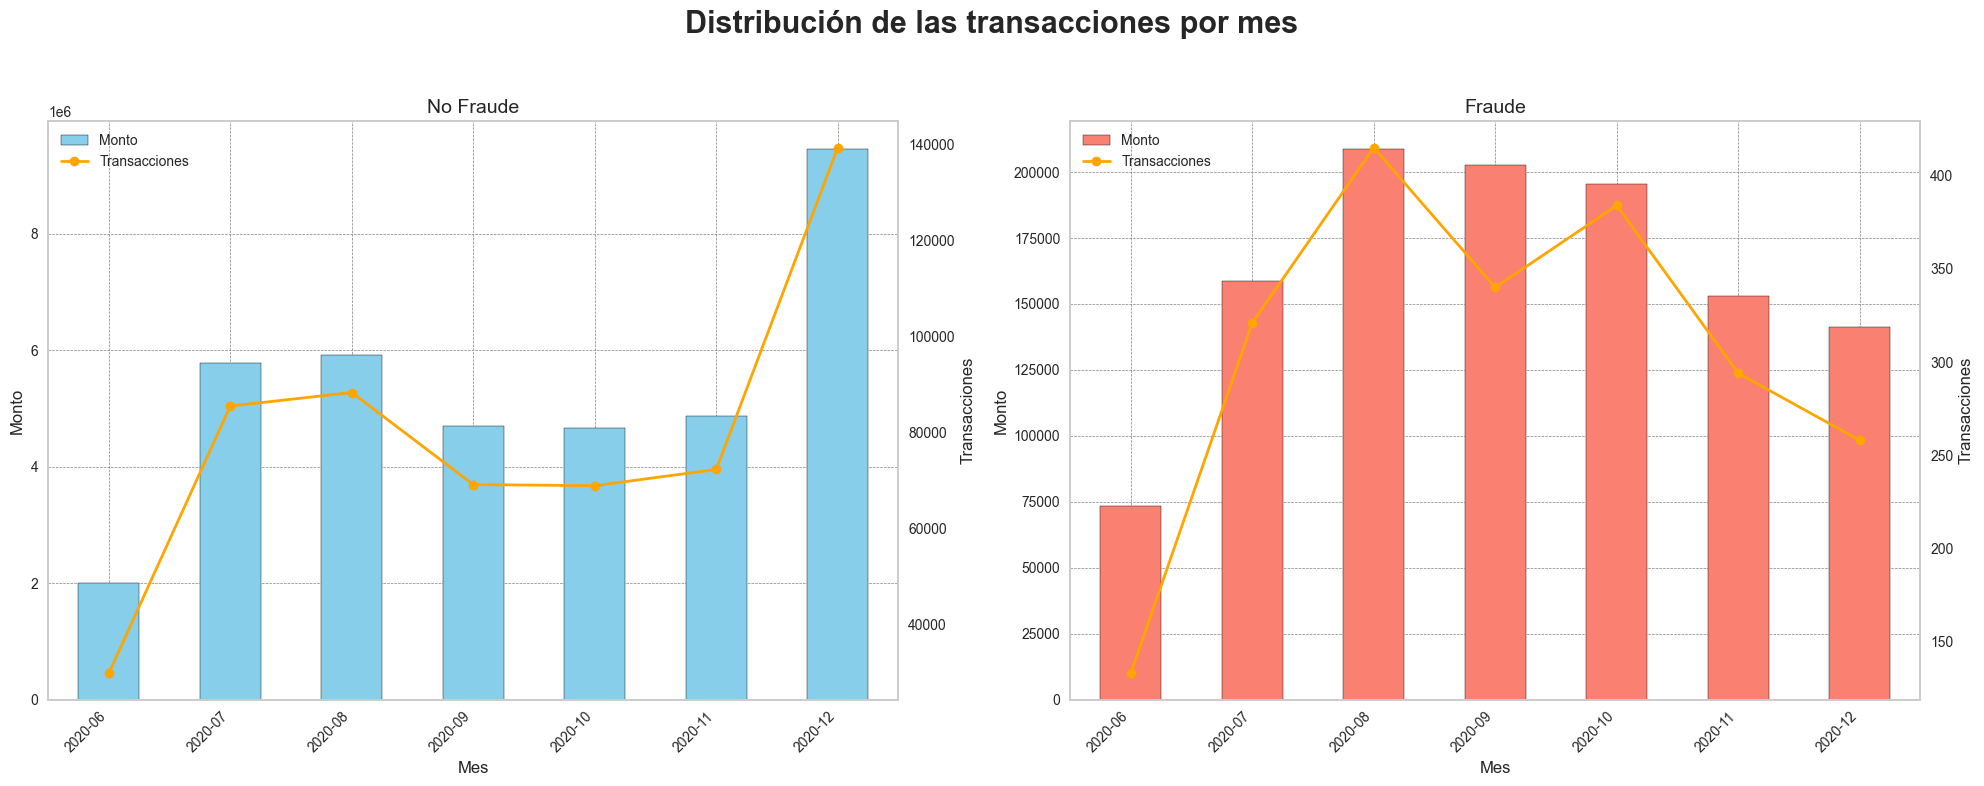

In [44]:
def plot_transactions_by_month(df_fraude):
    # Crear una figura con dos subgráficas
    fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=False)
    fig.suptitle("Distribución de las transacciones por mes", fontsize=22, fontweight='bold')

    # Colores para las gráficas
    colores_barras = ['skyblue', 'salmon']
    color_linea = 'orange'

    for i, ax in enumerate(axs):
        # Filtrar los datos según el tipo de fraude
        df_1 = df_fraude[df_fraude['es_fraude'] == i]
        
        # Gráfico de barras para el monto
        df_1.groupby('trans_mes')['monto'].sum().plot(kind='bar', ax=ax, color=colores_barras[i], label='Monto', edgecolor='black')
        ax.set_ylabel('Monto', fontsize=12)
        ax.set_xlabel('Mes', fontsize=12)
        ax.set_title(["No Fraude", "Fraude"][i], fontsize=14)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        
        # Crear un segundo eje y para las transacciones
        ax2 = ax.twinx()
        df_1.groupby('trans_mes').size().plot(kind='line', ax=ax2, color=color_linea, marker='o', label='Transacciones', linewidth=2)
        ax2.set_ylabel('Transacciones', fontsize=12)
        
        # Combinar leyendas
        handles1, labels1 = ax.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(handles1 + handles2, labels1 + labels2, loc='upper left', fontsize=10)
        
        # Mejorar apariencia del gráfico
        ax.grid(True, linestyle='--', linewidth=0.5, color='grey')
        ax2.grid(False)  # Desactivar cuadrícula en el segundo eje

    # Ajustar el diseño para que el título se muestre correctamente
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste del diseño para que se ajuste el título
    plt.show()

# Llamada a la función
plot_transactions_by_month(df_fraude)


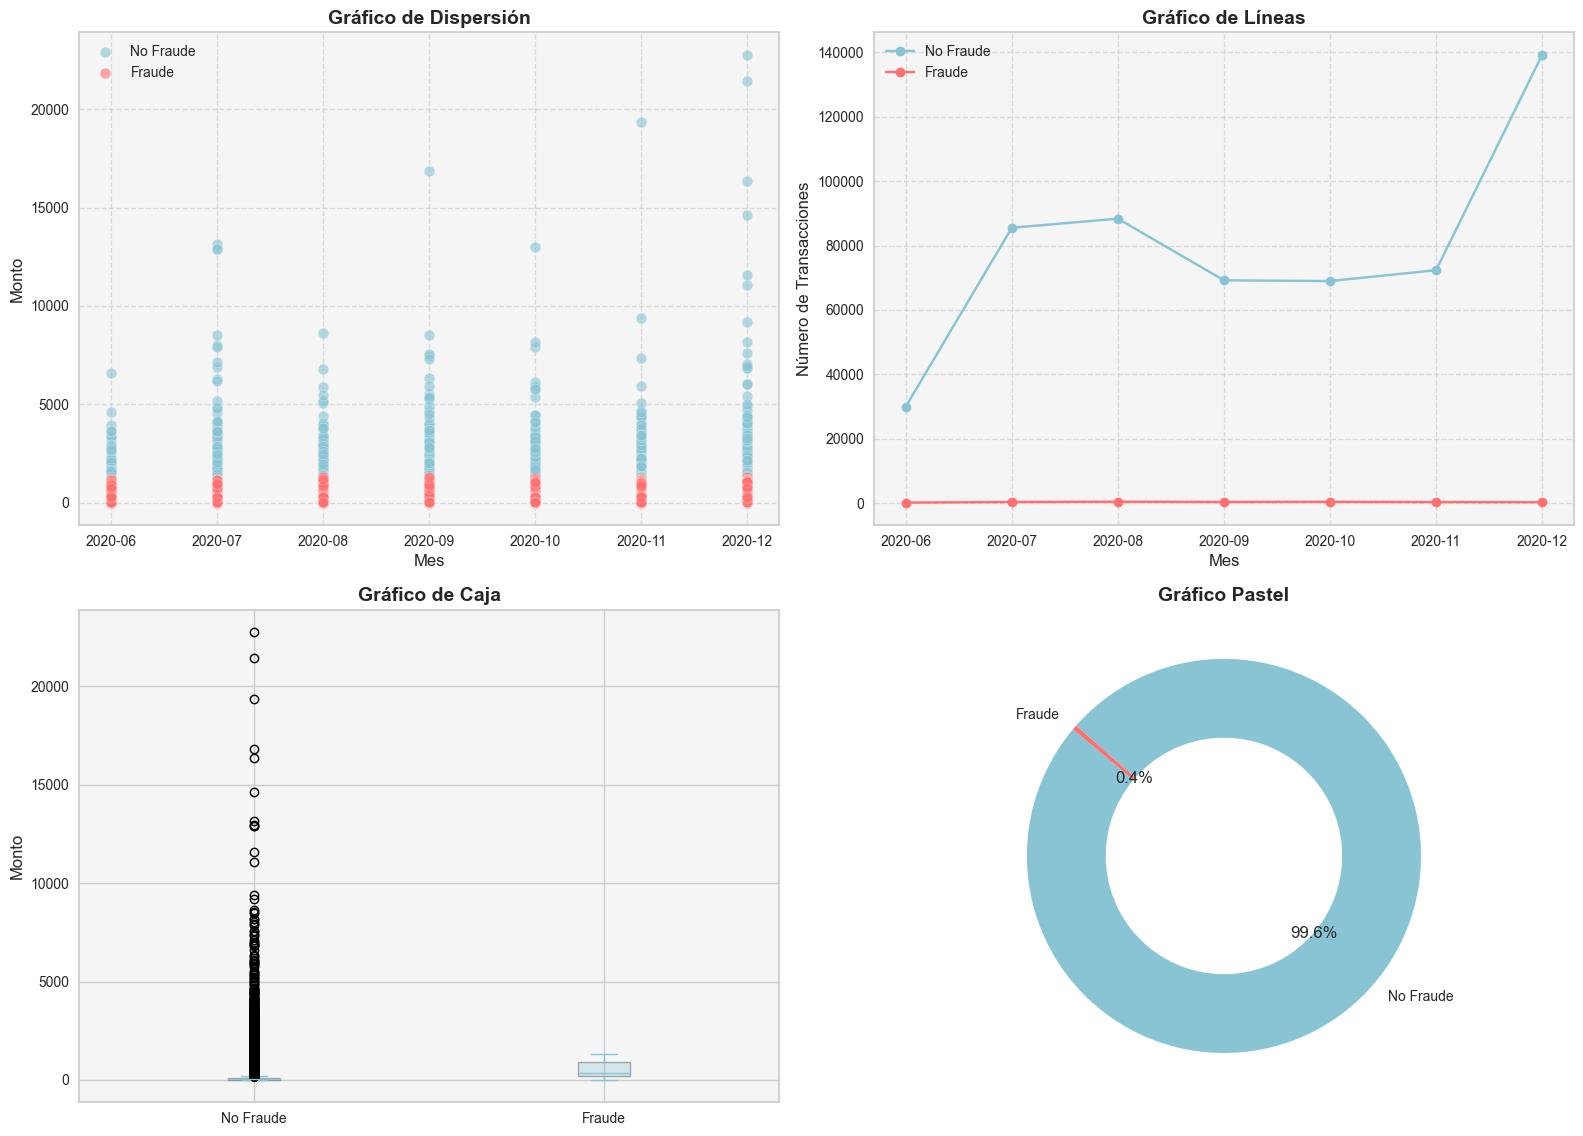

In [45]:

def plot_transactions_by_month(df_fraude):
    """
    Esta función genera gráficos de dispersión, líneas, caja y pastel que muestran la distribución de las transacciones por mes, 
    diferenciando entre transacciones fraudulentas y no fraudulentas.
    """
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))

    # Configurar los fondos de los subgráficos
    for ax in axs.flatten():
        ax.set_facecolor('#f5f5f5')  # Fondo gris claro

    # Gráfico de dispersión
    df_no_fraude = df_fraude[df_fraude['es_fraude'] == 0]
    df_fraude = df_fraude[df_fraude['es_fraude'] == 1]
    
    axs[0, 0].scatter(df_no_fraude['trans_mes'], df_no_fraude['monto'], color='#88c4d4', label='No Fraude', alpha=0.6, edgecolors='w', s=60)
    axs[0, 0].scatter(df_fraude['trans_mes'], df_fraude['monto'], color='#ff6f6f', label='Fraude', alpha=0.6, edgecolors='w', s=60)
    axs[0, 0].set_title('Gráfico de Dispersión', fontsize=14, fontweight='bold')
    axs[0, 0].set_xlabel('Mes', fontsize=12)
    axs[0, 0].set_ylabel('Monto', fontsize=12)
    axs[0, 0].legend()
    axs[0, 0].grid(True, linestyle='--', alpha=0.7)

    # Gráfico de líneas
    df_no_fraude_monthly = df_no_fraude.groupby('trans_mes').size()
    df_fraude_monthly = df_fraude.groupby('trans_mes').size()
    
    axs[0, 1].plot(df_no_fraude_monthly.index, df_no_fraude_monthly, color='#88c4d4', marker='o', label='No Fraude')
    axs[0, 1].plot(df_fraude_monthly.index, df_fraude_monthly, color='#ff6f6f', marker='o', label='Fraude')
    axs[0, 1].set_title('Gráfico de Líneas', fontsize=14, fontweight='bold')
    axs[0, 1].set_xlabel('Mes', fontsize=12)
    axs[0, 1].set_ylabel('Número de Transacciones', fontsize=12)
    axs[0, 1].legend()
    axs[0, 1].grid(True, linestyle='--', alpha=0.7)

    # Gráfico de caja
    axs[1, 0].boxplot([df_no_fraude['monto'], df_fraude['monto']], labels=['No Fraude', 'Fraude'], patch_artist=True, 
                      boxprops=dict(facecolor='#88c4d4', alpha=0.3), medianprops=dict(color='#88c4d4'),
                      whiskerprops=dict(color='#88c4d4'), capprops=dict(color='#88c4d4'))
    axs[1, 0].set_title('Gráfico de Caja', fontsize=14, fontweight='bold')
    axs[1, 0].set_ylabel('Monto', fontsize=12)

    # Gráfico pastel
    total_no_fraude = df_no_fraude.groupby('trans_mes').size().sum()
    total_fraude = df_fraude.groupby('trans_mes').size().sum()
    
    axs[1, 1].pie([total_no_fraude, total_fraude], 
                  labels=['No Fraude', 'Fraude'], 
                  colors=['#88c4d4', '#ff6f6f'],
                  autopct='%1.1f%%', 
                  startangle=140,
                  wedgeprops=dict(width=0.4))
    axs[1, 1].set_title('Gráfico Pastel', fontsize=14, fontweight='bold')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Llamada a la función
plot_transactions_by_month(df_fraude)


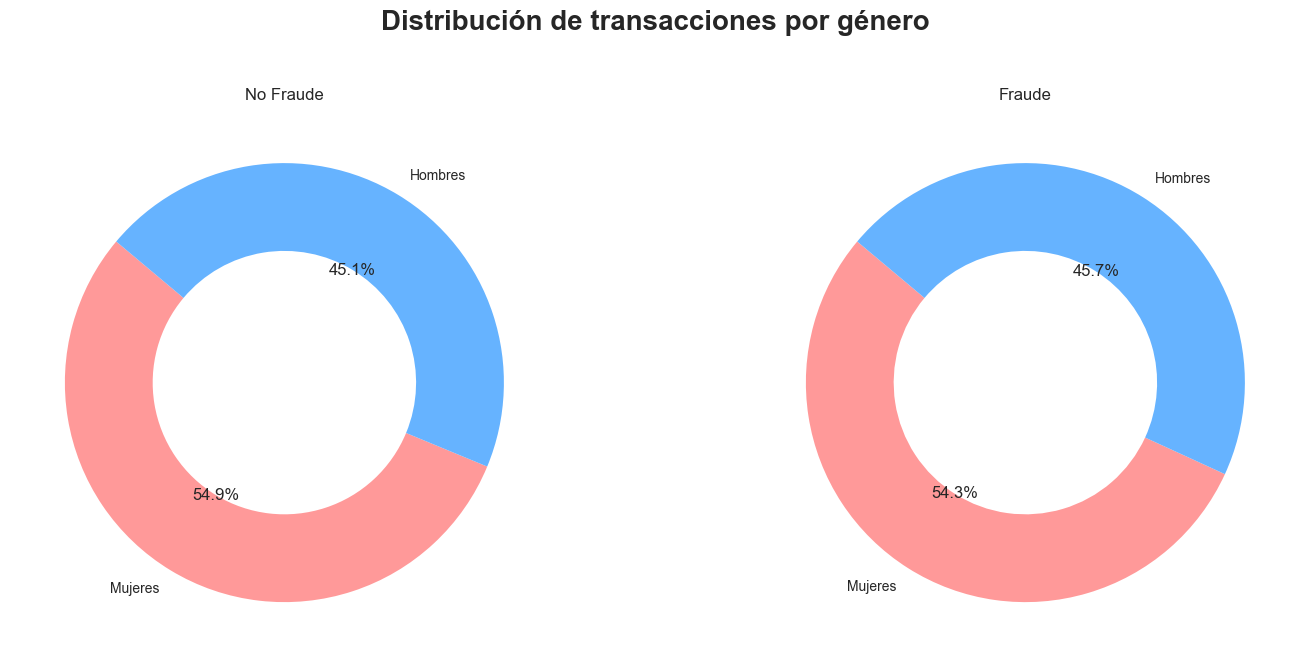

In [46]:

def plot_transactions_by_gender(df_fraude):
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    plt.suptitle("Distribución de transacciones por género", fontsize=20, fontweight='bold')
    
    # Definir colores
    colors = ['#ff9999','#66b3ff']
    gender_labels = ['Mujeres', 'Hombres']
    status_labels = ["No Fraude", "Fraude"]

    for i in range(2):
        df_1 = df_fraude[df_fraude['es_fraude'] == i]
        gender_counts = df_1['genero'].value_counts()
        
        axs[i].pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', colors=colors,
                   startangle=140, wedgeprops=dict(width=0.4))
        axs[i].set_title(status_labels[i])

    # Ajustar el diseño
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Llamada a la función
plot_transactions_by_gender(df_fraude)


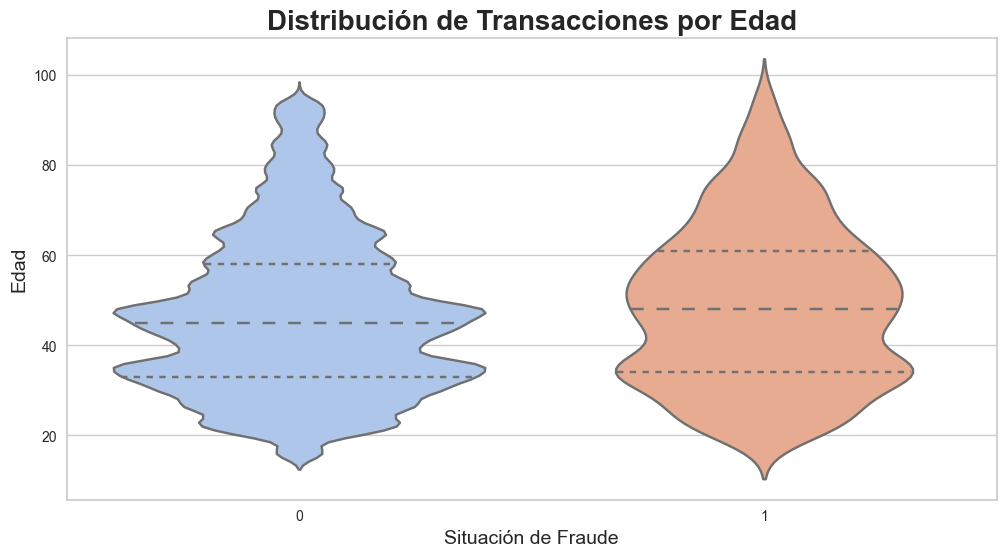

In [47]:

def plot_transactions_by_age_violin(df_fraude):
    # Crear la figura
    plt.figure(figsize=(12, 6))
    
    # Crear un gráfico de violín con colores pastel
    sns.violinplot(data=df_fraude, x='es_fraude', y='edad', palette=['#a3c4f3', '#f4a582'], inner="quartile")
    
    # Ajustar los títulos y etiquetas de los ejes
    plt.title('Distribución de Transacciones por Edad', fontsize=20, fontweight='bold')
    plt.xlabel('Situación de Fraude', fontsize=14)
    plt.ylabel('Edad', fontsize=14)
    
    # Mostrar la gráfica
    plt.show()

# Llamada a la función
plot_transactions_by_age_violin(df_fraude)


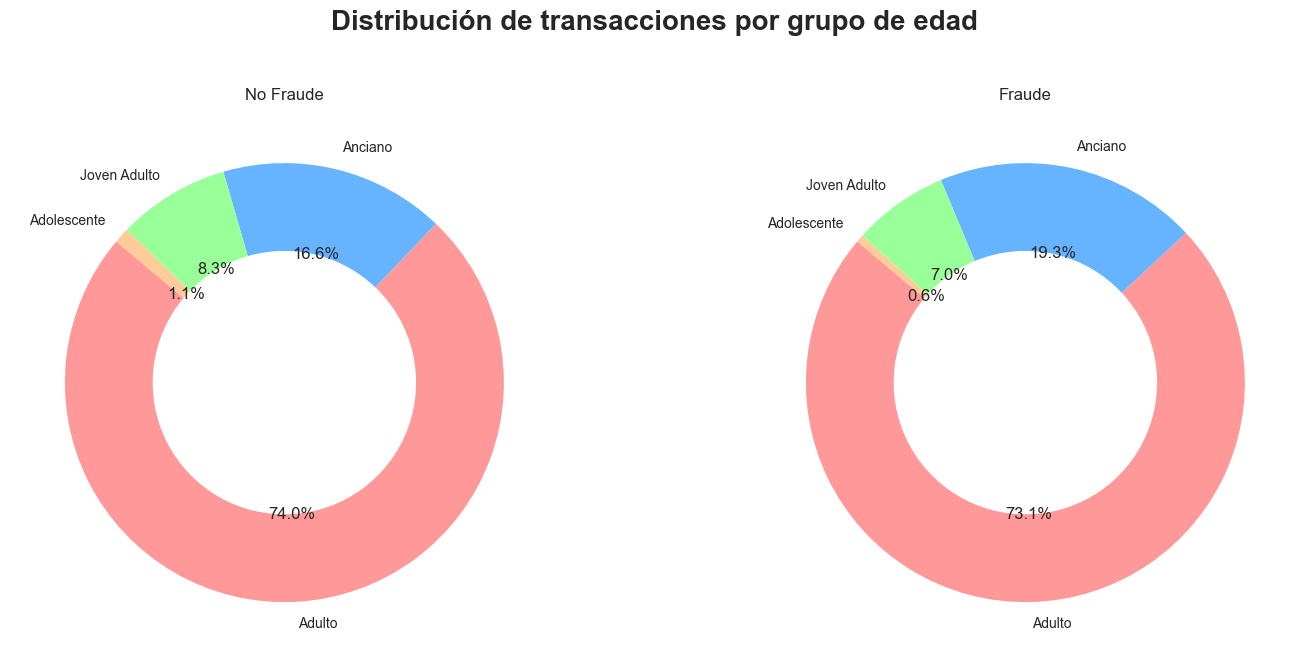

In [48]:
# transaccion por grupo de edad 
def plot_transactions_by_age_group(df_fraude):
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    plt.suptitle("Distribución de transacciones por grupo de edad", fontsize=20, fontweight='bold')

    # Definir colores
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

    for i in range(2):
        df_1 = df_fraude[df_fraude['es_fraude'] == i]
        age_counts = df_1['grupo_edad'].value_counts()
        
        axs[i].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', colors=colors,
                   startangle=140, wedgeprops=dict(width=0.4))
        axs[i].set_title(["No Fraude", "Fraude"][i])

    # Ajustar el diseño
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Llamada a la función
plot_transactions_by_age_group(df_fraude)


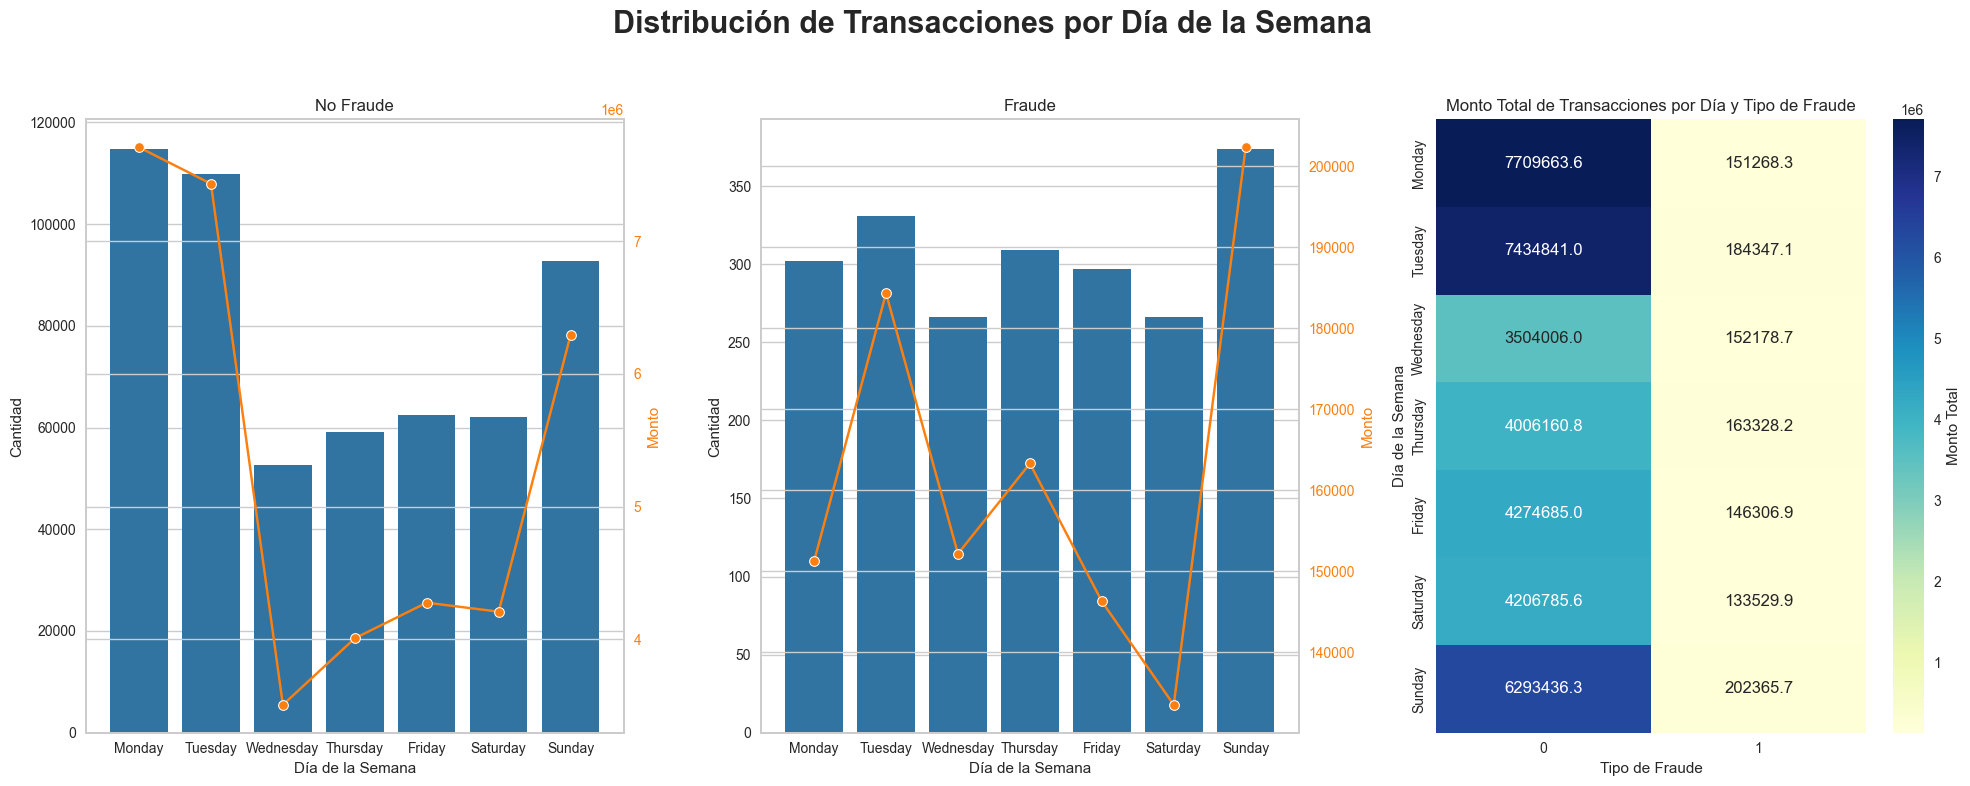

In [49]:
def plot_transactions_by_day_of_week(df_fraude):
    """
    Función para graficar la distribución de transacciones por día de la semana,
    diferenciando entre transacciones fraudulentas y no fraudulentas, y mostrar
    un gráfico de calor adicional.

    """
    # Crear una figura con un tamaño adecuado
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    plt.suptitle("Distribución de Transacciones por Día de la Semana", fontsize=22, fontweight='bold')

    # Lista de días de la semana
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    for i in range(2):
        # Filtrar datos por tipo de fraude (0: No Fraude, 1: Fraude)
        df_filtered = df_fraude[df_fraude['es_fraude'] == i]
        
        # Gráfico de barras para la cantidad de transacciones
        ax = axes[i]
        bar_data = df_filtered.groupby('trans_diaDeLaSemana').size().reindex(days_of_week).reset_index(name='Count')
        sns.barplot(data=bar_data, x='trans_diaDeLaSemana', y='Count', color='#1f77b4', order=days_of_week, ax=ax)
        ax.set_ylabel('Cantidad')
        ax.set_xlabel('Día de la Semana')
        
        # Crear un segundo eje y para la línea de la cantidad total de dinero
        ax2 = ax.twinx()
        line_data = df_filtered.groupby('trans_diaDeLaSemana')['monto'].sum().reindex(days_of_week).reset_index(name='Amount')
        sns.lineplot(data=line_data, x='trans_diaDeLaSemana', y='Amount', color='#ff7f0e', marker='o', ax=ax2)
        ax2.set_ylabel('Monto', color='#ff7f0e')
        ax2.tick_params(axis='y', labelcolor='#ff7f0e')
        
        # Configurar leyenda
        handles, labels = ax.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(handles + handles2, labels + labels2, loc='upper left')
        
        # Configurar título y etiquetas
        ax.set_title(["No Fraude", "Fraude"][i])

    # Gráfico de calor (heatmap) para cantidad total de transacciones y monto total
    ax_heatmap = axes[2]
    heatmap_data = df_fraude.groupby(['trans_diaDeLaSemana', 'es_fraude'])['monto'].sum().unstack().reindex(days_of_week)
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', ax=ax_heatmap, cbar_kws={'label': 'Monto Total'})
    ax_heatmap.set_title('Monto Total de Transacciones por Día y Tipo de Fraude')
    ax_heatmap.set_xlabel('Tipo de Fraude')
    ax_heatmap.set_ylabel('Día de la Semana')

    # Ajustar el espaciado y mostrar el gráfico
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Llamada a la función
plot_transactions_by_day_of_week(df_fraude)


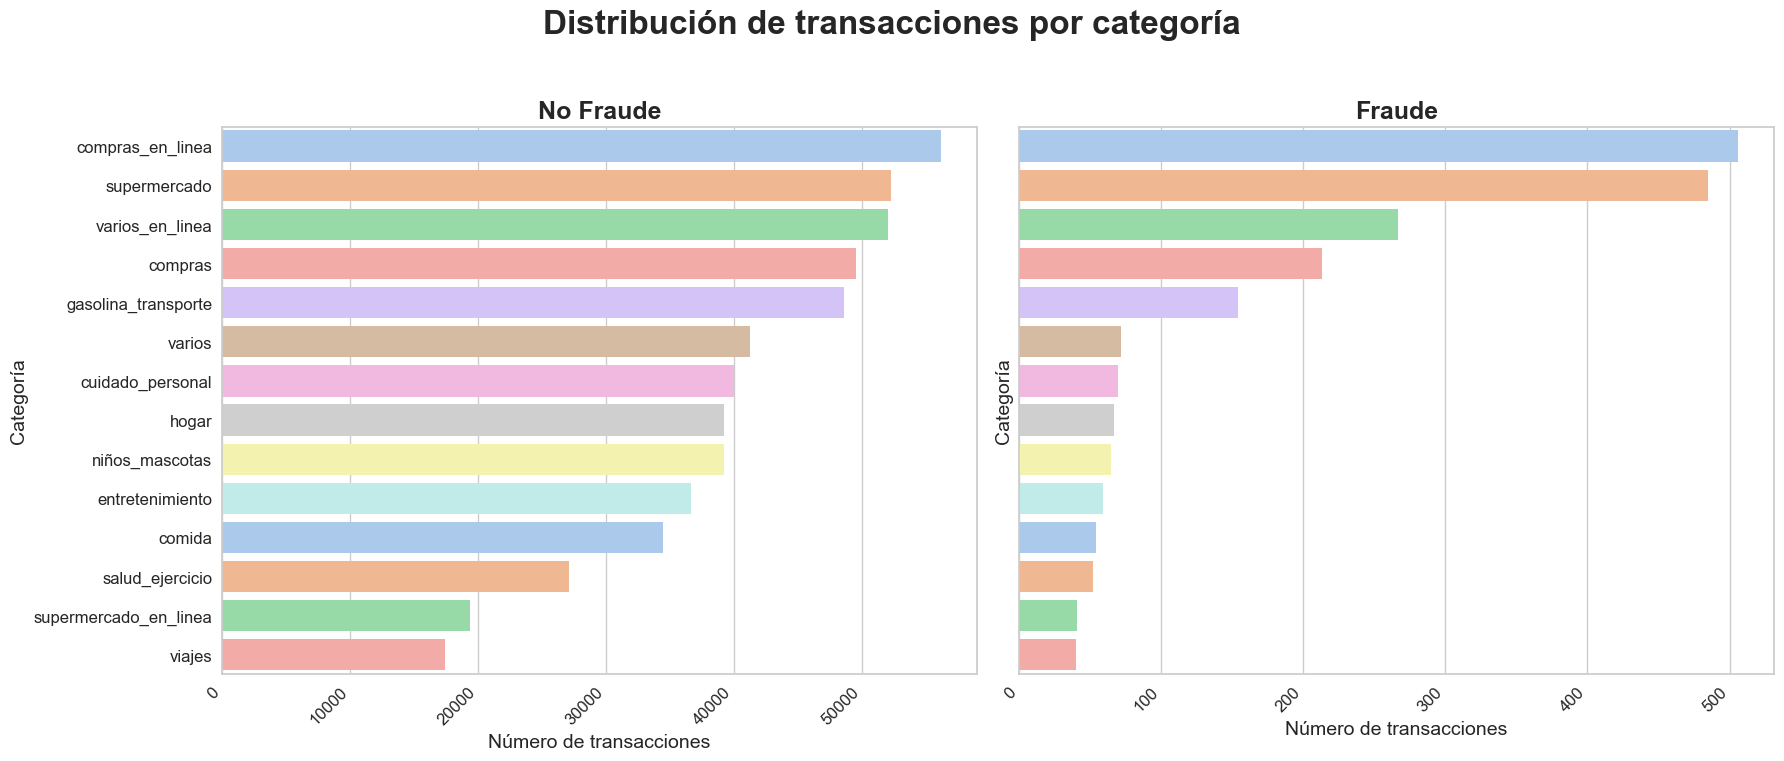

In [50]:
def plot_transactions_by_category(df_fraude):
    # Renombrar categorías de inglés a español
    categorias_renombradas = {
        'gas_transport': 'gasolina_transporte',
        'grocery_pos': 'supermercado',
        'home': 'hogar',
        'shopping_pos': 'compras',
        'kids_pets': 'niños_mascotas',
        'shopping_net': 'compras_en_linea',
        'entertainment': 'entretenimiento',
        'personal_care': 'cuidado_personal',
        'food_dining': 'comida',
        'health_fitness': 'salud_ejercicio',
        'misc_pos': 'varios',
        'misc_net': 'varios_en_linea',
        'grocery_net': 'supermercado_en_linea',
        'travel': 'viajes'
    }
    
    # Renombrar la columna 'category' a 'categoria'
    df_fraude['categoria'] = df_fraude['categoria'].replace(categorias_renombradas)
    
    # Crear una figura con dos subgráficas en una fila y dos columnas
    fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
    plt.suptitle("Distribución de transacciones por categoría", fontsize=24, fontweight='bold')
    
    # Colores pastel para las categorías
    pastel_colors = sns.color_palette("pastel", len(df_fraude['categoria'].unique()))
    
    for i, ax in enumerate(axes):
        # Filtrar el DataFrame por el tipo de fraude
        df_1 = df_fraude[df_fraude['es_fraude'] == i]
        
        # Crear el gráfico de barras usando seaborn
        sns.countplot(data=df_1, y='categoria', order=df_1['categoria'].value_counts().index, ax=ax, palette=pastel_colors)
        
        # Ajustar etiquetas y títulos
        ax.set_title(["No Fraude", "Fraude"][i], fontsize=18, fontweight='bold')
        ax.set_xlabel('Número de transacciones', fontsize=14)
        ax.set_ylabel('Categoría', fontsize=14)
        ax.tick_params(axis='both', labelsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Ajustar espacio entre subgráficas
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Mostrar la figura
    plt.show()

# Llamada a la función
plot_transactions_by_category(df_fraude)


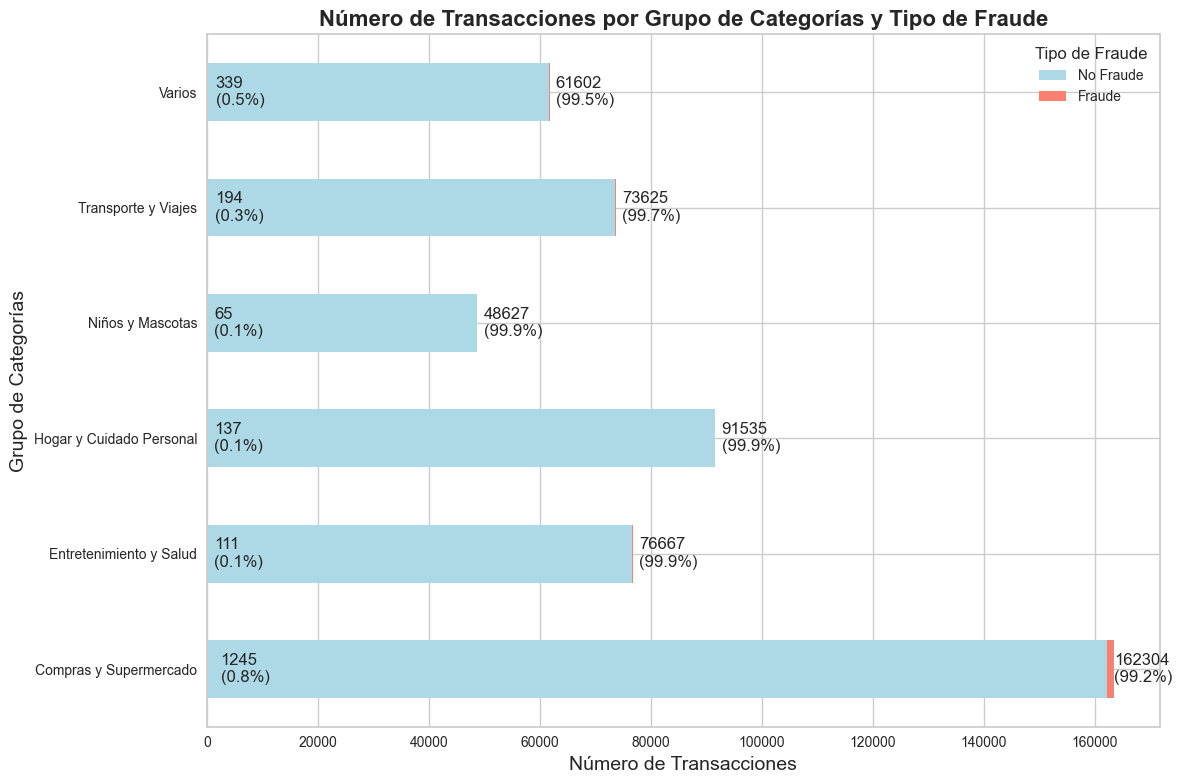

In [51]:
def plot_fraud_vs_no_fraud_stacked(df_fraude):
    # Crear un diccionario de mapeo para las categorías originales a las nuevas categorías agrupadas
    categorias_agrupadas = {
        'Compras y Supermercado': [
            'supermercado',        # grocery_pos
            'compras',             # shopping_pos
            'compras_en_linea',    # shopping_net
            'supermercado_en_linea'  # grocery_net
        ],
        'Transporte y Viajes': [
            'gasolina_transporte',  # gas_transport
            'viajes'                # travel
        ],
        'Hogar y Cuidado Personal': [
            'hogar',               # home
            'cuidado_personal'     # personal_care
        ],
        'Entretenimiento y Salud': [
            'entretenimiento',     # entertainment
            'salud_ejercicio'      # health_fitness
        ],
        'Niños y Mascotas': [
            'niños_mascotas'       # kids_pets
        ],
        'Varios': [
            'varios',              # misc_pos
            'varios_en_linea'      # misc_net
        ]
    }

    # Invertir el diccionario para facilitar el mapeo
    categoria_a_grupo = {cat: grupo for grupo, cats in categorias_agrupadas.items() for cat in cats}

    # Mapear las categorías en el DataFrame
    df_fraude['categoria_agrupada'] = df_fraude['categoria'].map(categoria_a_grupo)

    # Contar el número de transacciones por grupo de categorías y fraude
    df_agrupado = df_fraude.groupby(['categoria_agrupada', 'es_fraude']).size().unstack().fillna(0)

    # Graficar los resultados
    fig, ax = plt.subplots(figsize=(12, 8))

    # Crear el gráfico de barras apiladas
    df_agrupado.plot(kind='barh', stacked=True, color=['lightblue', 'salmon'], ax=ax)

    # Añadir anotaciones con porcentaje
    for i, (categoria, row) in enumerate(df_agrupado.iterrows()):
        total = row.sum()
        y = i
        for j, (col, value) in enumerate(row.items()):
            percentage = (value / total) * 100
            if value > 0:
                ax.annotate(f'{value}\n({percentage:.1f}%)', (value, y), ha='left', va='center', size=12, xytext=(5, 0), textcoords='offset points')

    # Ajustar los labels y títulos
    plt.title('Número de Transacciones por Grupo de Categorías y Tipo de Fraude', fontsize=16, fontweight='bold')
    plt.xlabel('Número de Transacciones', fontsize=14)
    plt.ylabel('Grupo de Categorías', fontsize=14)
    plt.legend(title='Tipo de Fraude', labels=['No Fraude', 'Fraude'])
    plt.tight_layout()

    plt.show()

# Llamada a la función
plot_fraud_vs_no_fraud_stacked(df_fraude)


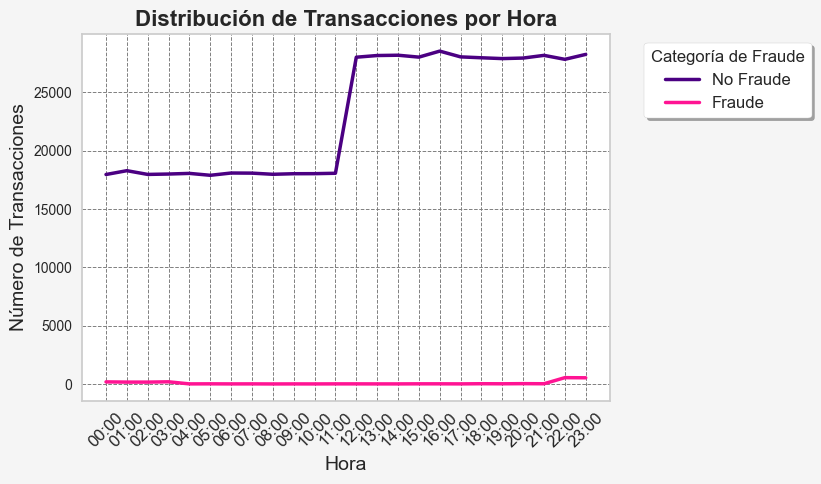

In [52]:
# Supongamos que df_fraude ya está definido
# Ejemplo de datos para ilustrar
# df_fraude = pd.DataFrame({
#     'trans_hora_agrupado': list(range(24)) * 2,
#     'es_fraude': [0]*24 + [1]*24,
#     'count': [10]*24 + [5]*24
# })

# Títulos para los gráficos
name = ['No Fraude', 'Fraude']

# Crear una figura y un solo subplot
fig, ax = plt.subplots(figsize=(10, 5))

# Título general de la figura
plt.title("Distribución de Transacciones por Hora", fontsize=16, fontweight='bold')

# Estilo de fondo de la figura
fig.patch.set_facecolor('#f5f5f5')  # Color de fondo de la figura

# Crear un gráfico de líneas para cada categoría de fraude
for i in range(2):
    temp = df_fraude[df_fraude['es_fraude'] == i].groupby('trans_hora_agrupado').size().reset_index(name='count').sort_values(by='trans_hora_agrupado')
    sns.lineplot(data=temp, x="trans_hora_agrupado", y="count", color=['#4B0082', '#FF1493'][i], label=name[i], linewidth=2.5, ax=ax)

# Configurar los ticks del eje x
ax.set_xticks(range(24))
ax.set_xticklabels([f'{i:02d}:00' for i in range(24)], rotation=45, fontsize=12)

# Etiquetas y leyenda
ax.set_xlabel('Hora', fontsize=14)
ax.set_ylabel('Número de Transacciones', fontsize=14)
ax.legend(title='Categoría de Fraude', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, shadow=True)

# Configuración de la cuadrícula
ax.grid(True, linestyle='--', linewidth=0.7, color='gray')

# Fondo del gráfico
ax.set_facecolor('#ffffff')  # Color de fondo del gráfico

# Ajustar el diseño para que no se recorte la leyenda
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


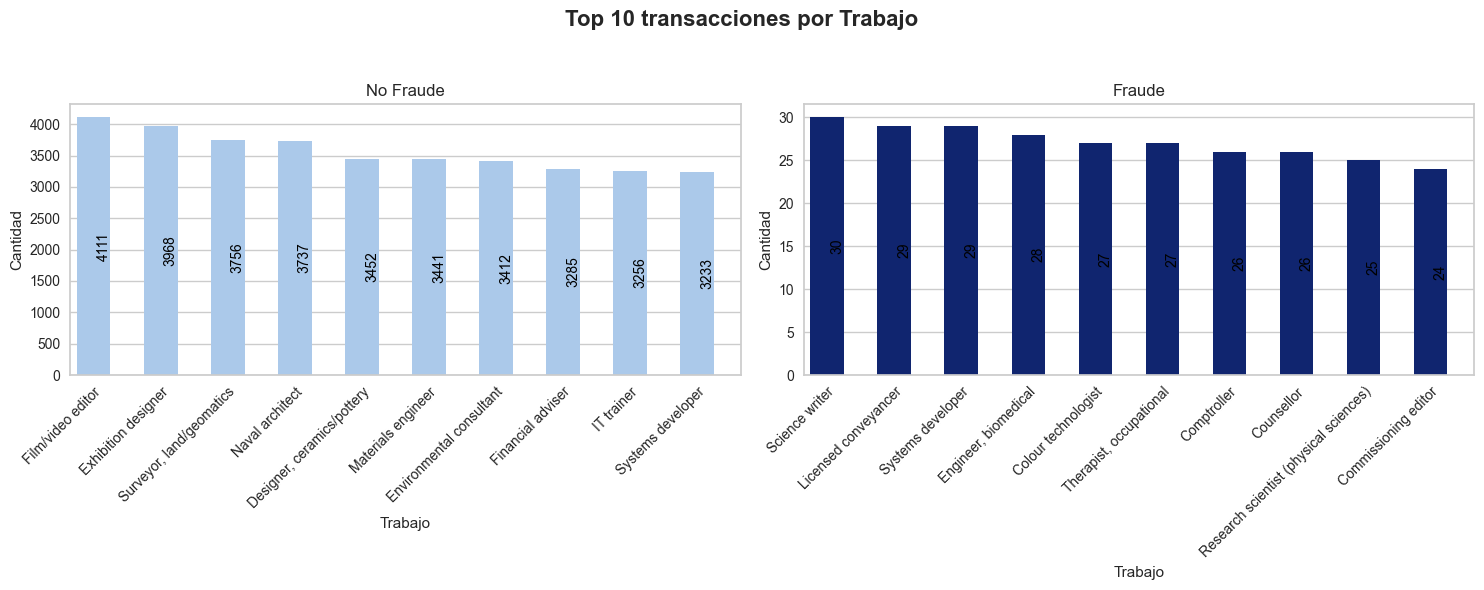

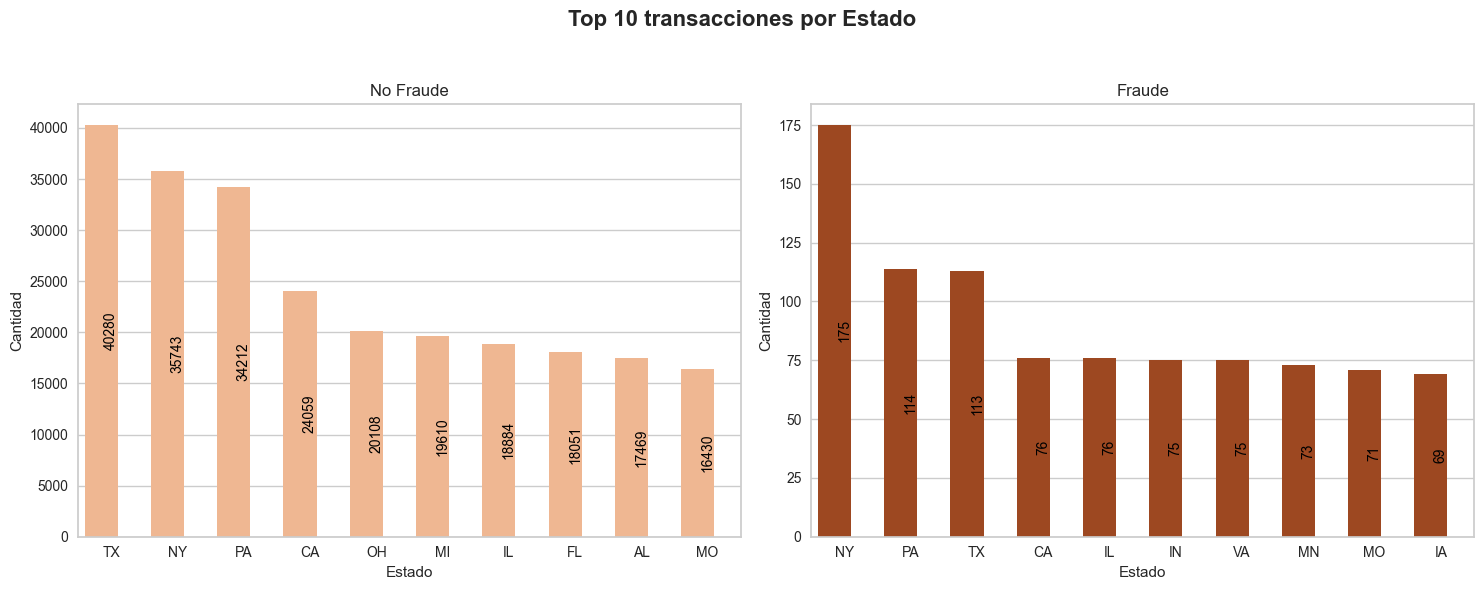

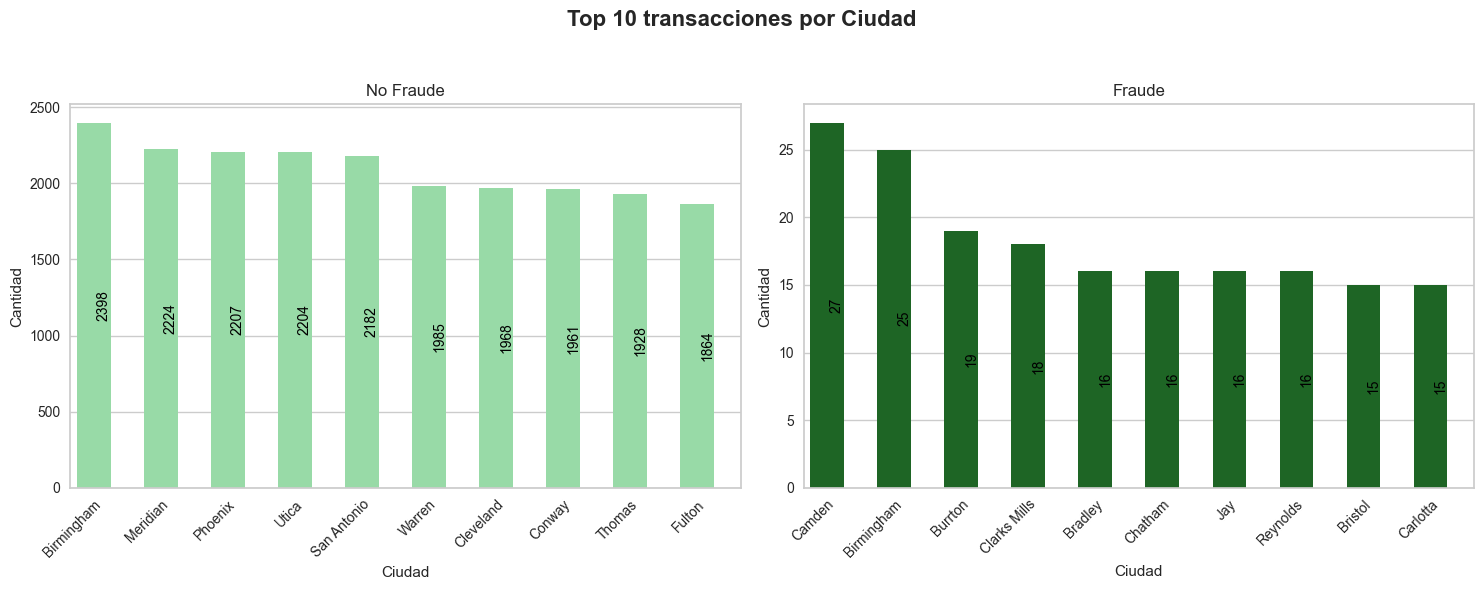

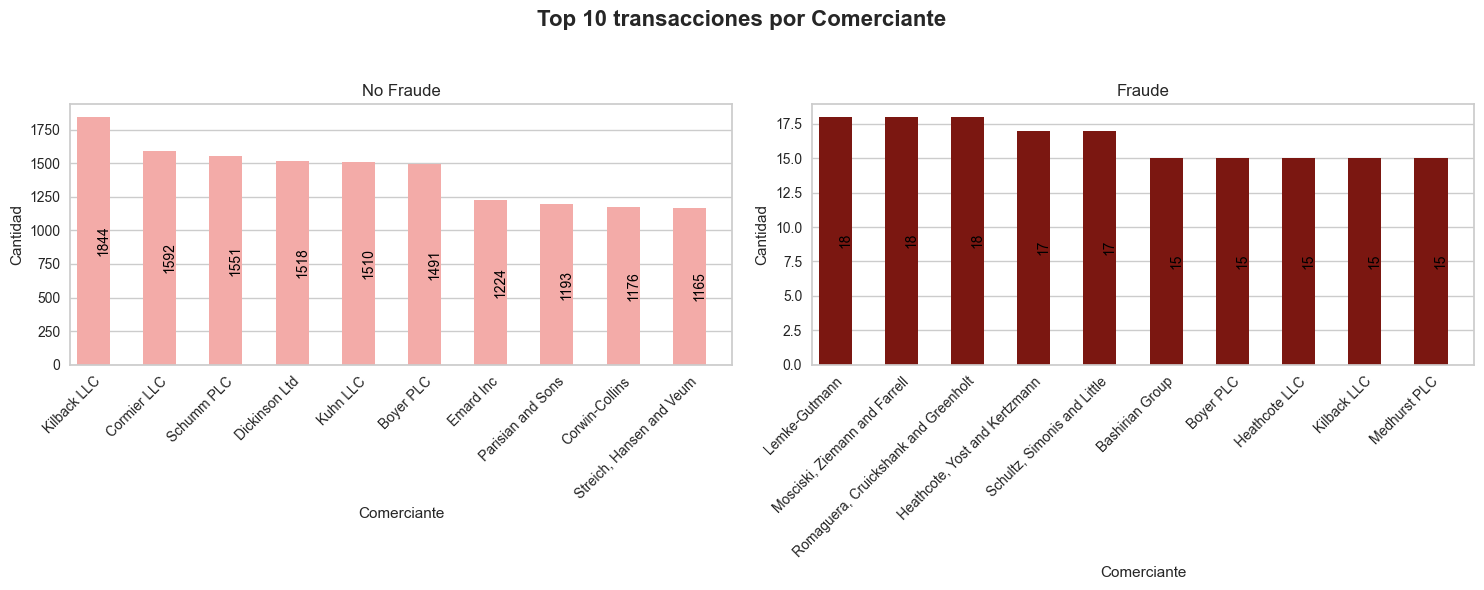

In [53]:
# Definir columnas y nombres
columns = ['trabajo', 'estado', 'ciudad', 'comerciante']
columns_name = ['Trabajo', 'Estado', 'Ciudad', 'Comerciante']
fraud = ['No Fraude', 'Fraude']

# Definir paletas de colores pastel
colors_no_fraud = sns.color_palette("pastel")  # Colores pastel para no fraude
colors_fraud = sns.color_palette("dark")  # Colores más oscuros para fraude

# Generar gráficos
for y, col in enumerate(columns):
    name = columns_name[y]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    fig.suptitle(f"Top 10 transacciones por {name}", fontsize=16, fontweight="bold")
    
    for i, ax in enumerate(axes):
        temp_df = df_fraude[df_fraude['es_fraude'] == i]
        top = temp_df.groupby(col).size().nlargest(10).reset_index(name='Count')
        
        # Usar colores diferentes para no fraude y fraude
        color = colors_no_fraud[y] if i == 0 else colors_fraud[y]
        
        sns.barplot(data=top, x=col, y='Count', color=color, ax=ax)
        
        # Ajustes de etiquetas y títulos
        if col == 'estado':
            ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        else:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        
        ax.set_ylabel('Cantidad')
        ax.set_xlabel(name)
        ax.set_title(fraud[i])
        
        # Ajustar el tamaño de las barras
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', xytext=(0, 0), textcoords='offset points', color='black', rotation=90, fontsize=10)
        
        # Reducir el ancho de las barras
        for p in ax.patches:
            p.set_width(0.5)
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Índices de correlación más altos:
es_fraude - no_fraude: -1.0000000000000002


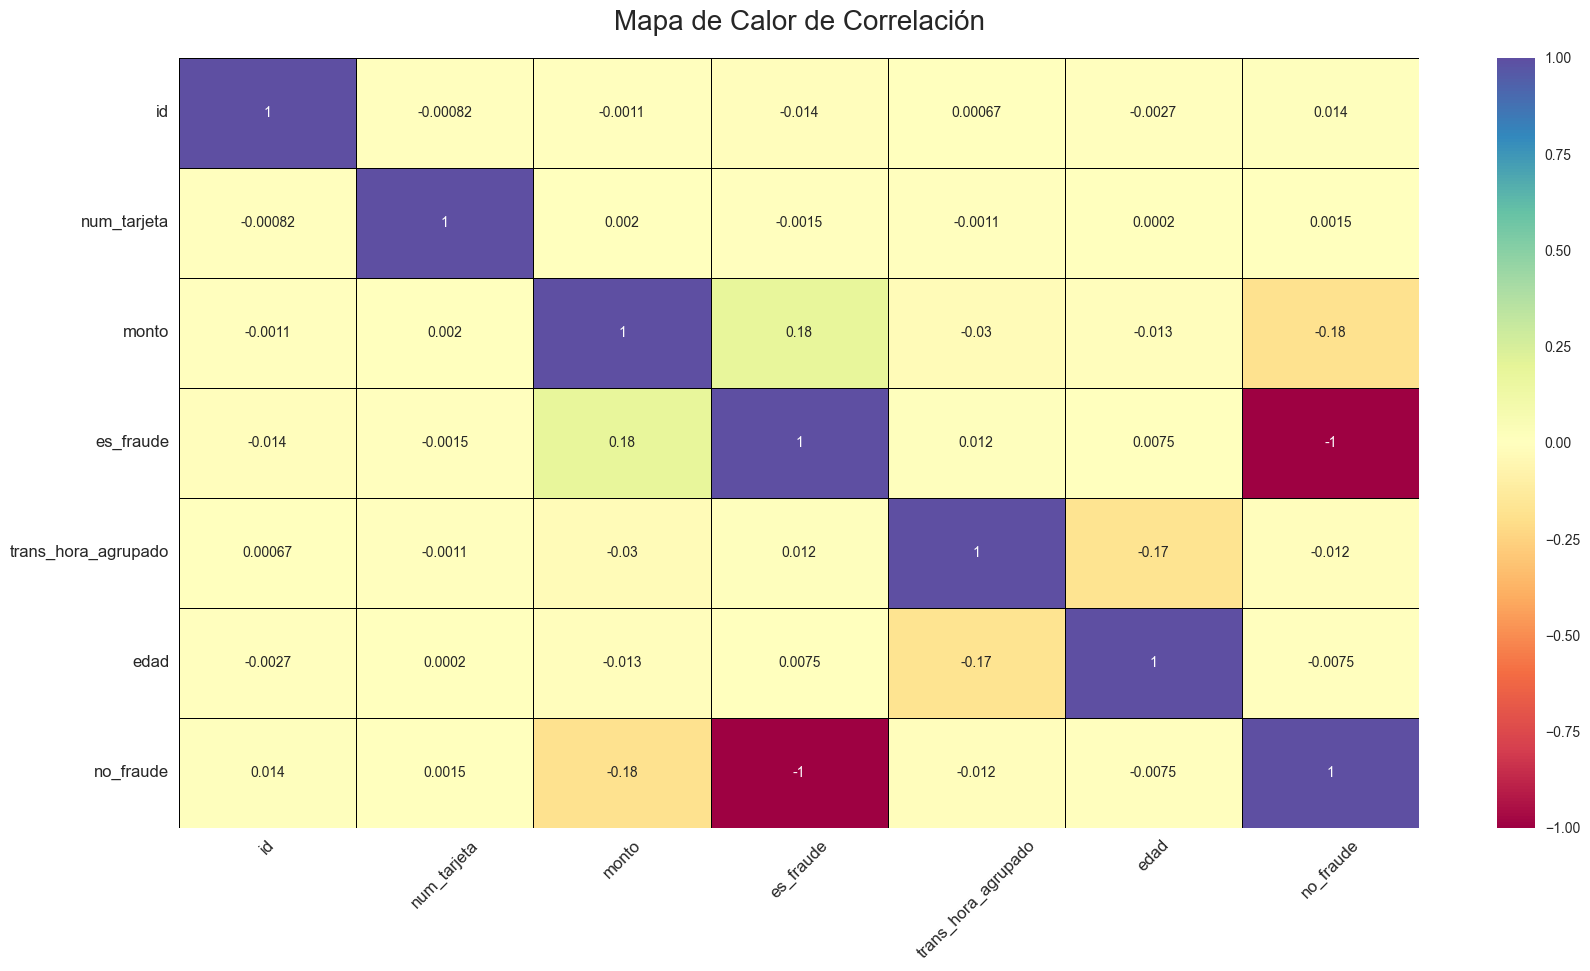

In [54]:
# Seleccionar solo columnas numéricas
numeric_df = df_fraude.select_dtypes(include=[np.number])

# Crear el mapa de calor de correlación
plt.figure(figsize=(20, 10))
corr_matrix = numeric_df.corr()
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='Spectral', annot_kws={"size": 10}, linewidths=0.5, linecolor='black')
heatmap.set_title('Mapa de Calor de Correlación', fontdict={'fontsize': 20}, pad=20)
heatmap.tick_params(axis='x', rotation=45, labelsize=12)
heatmap.tick_params(axis='y', rotation=0, labelsize=12)

# Obtener los índices de correlación más altos
threshold = 0.3  # Define el umbral de correlación deseado
high_corr_indices = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_indices.add((corr_matrix.columns[j], colname))

# Mostrar los índices de correlación más altos
if high_corr_indices:
    print("Índices de correlación más altos:")
    for pair in high_corr_indices:
        print(f"{pair[0]} - {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]}")
else:
    print("No se encontraron índices de correlación por encima del umbral.")

# Mostrar el gráfico
plt.show()


--------------------------------------------------
--------------------------------------------------
#--- **SEGUNDA PARTE** ---

### Modelos de Aprendizaje

In [55]:
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report, precision_score, f1_score


In [56]:
# Verificar las columnas disponibles en df_fraude
#print("Columnas en df_fraude:", df_fraude.columns)

# Intentar eliminar columnas especificadas
#df_fraude.drop(columns=['calle', 'nombre', 'apellido', 'fraud'], inplace=True, errors='ignore')
#df_train = df_fraude.copy()

# Codificación de etiquetas
#le = LabelEncoder()
#for columna in df_train.columns:
#    if df_train[columna].dtype == 'object':
#        df_train[columna] = le.fit_transform(df_train[columna])


In [57]:
# Verificar las columnas disponibles en df_fraude
print("Columnas en df_fraude:", df_fraude.columns)

# Intentar eliminar columnas especificadas
#df_fraude.drop(columns=['calle', 'nombre', 'apellido', 'fraud'], inplace=True, errors='ignore')
df_train = df_fraude.copy()

# Codificación de etiquetas
le = LabelEncoder()
for columna in df_train.columns:
    if df_train[columna].dtype == 'object':
        df_train[columna] = le.fit_transform(df_train[columna])

# Seleccionar características (X) y la etiqueta (y)
# Definir las columnas que se usarán como características y la etiqueta objetivo
caracteristicas_modelo = ["genero", "trabajo", "categoria", "comerciante", "estado", "edad"]
objetivo = ["es_fraude"]

X = df_train[caracteristicas_modelo] # Caracteristicas
y = df_train[objetivo] # Etiqueta objetivo

# Construir el modelo
# Dividir el dataset en conjuntos de entrenamiento y prueba
# Divide el conjunto de datos en entrenamiento (80%) y prueba (20%).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Balancear el conjunto de datos utilizando SMOTE
# Aumentar el número de ejemplos de la clase minoritaria para manejar el desbalance de clases
smote = SMOTE(sampling_strategy='auto')
X_train_resampleado, y_train_resampleado = smote.fit_resample(X_train, y_train)
X_train = X_train_resampleado
y_train = y_train_resampleado

# Estandarización
# Escalar las características para que tengan media 0 y desviación estándar 1
escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)  # Asegúrate de estandarizar también X_test

Columnas en df_fraude: Index(['id', 'fecha_transaccion', 'num_tarjeta', 'comerciante', 'categoria',
       'monto', 'genero', 'ciudad', 'estado', 'trabajo', 'es_fraude',
       'trans_fecha', 'trans_hora', 'trans_hora_agrupado', 'trans_mes',
       'trans_diaDeLaSemana', 'edad', 'grupo_edad', 'no_fraude', 'fraud',
       'categoria_agrupada'],
      dtype='object')


# Entrenamiento e impresión de los resultados

Para cada uno de los modelos se realiza un bucle que recolecta la información.

In [58]:
# Inicializar los modelos
# Crear instancias de los modelos de regresión logística, árbol de decisión, XGBoost y LightGBM
modelo_logistico = LogisticRegression()
arbol_decision = DecisionTreeClassifier()
modelo_xgboost = xgb.XGBClassifier()
modelo_lightgbm = lgb.LGBMClassifier()

In [59]:
# Entrenar los modelos
# Ajustar los modelos a los datos de entrenamiento balanceados
modelo_logistico.fit(X_train, y_train)
arbol_decision.fit(X_train, y_train)
modelo_xgboost.fit(X_train, y_train)
modelo_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 387498, number of negative: 387498
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 774996, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [60]:
# Predicciones
# Predecir las etiquetas para los datos de prueba usando los modelos entrenados
y_pred_logistico = modelo_logistico.predict(X_test)
y_pred_arbol = arbol_decision.predict(X_test)
y_pred_xgboost = modelo_xgboost.predict(X_test)
y_pred_lightgbm = modelo_lightgbm.predict(X_test)

In [61]:
# Evaluación del modelo logistico 
print("\n===== Informe de Evaluación del Modelo =====")
print("Exactitud:", accuracy_score(y_test, y_pred_logistico))
print("ROC AUC:", roc_auc_score(y_test, y_pred_logistico))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_logistico))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_logistico))
print("\nMétricas adicionales:")
print("Precisión:", precision_score(y_test, y_pred_logistico))
print("Recall:", recall_score(y_test, y_pred_logistico))
print("F1-score:", f1_score(y_test, y_pred_logistico))


===== Informe de Evaluación del Modelo =====
Exactitud: 0.4852083783200173
ROC AUC: 0.4886844915881885

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.49      0.65    166076
           1       0.00      0.49      0.01       640

    accuracy                           0.49    166716
   macro avg       0.50      0.49      0.33    166716
weighted avg       0.99      0.49      0.65    166716


Matriz de Confusión:
[[80577 85499]
 [  325   315]]

Métricas adicionales:
Precisión: 0.0036707297177616706
Recall: 0.4921875
F1-score: 0.007287112221528212


In [62]:
# Evaluación del modelo arbol de decision
print("\n===== Informe de Evaluación del Modelo =====")
print("Exactitud:", accuracy_score(y_test, y_pred_arbol))
print("ROC AUC:", roc_auc_score(y_test, y_pred_arbol))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_arbol))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_arbol))
print("\nMétricas adicionales:")
print("Precisión:", precision_score(y_test, y_pred_arbol))
print("Recall:", recall_score(y_test, y_pred_arbol))
print("F1-score:", f1_score(y_test, y_pred_arbol))


===== Informe de Evaluación del Modelo =====
Exactitud: 0.991086638355047
ROC AUC: 0.5589338804222164

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    166076
           1       0.08      0.12      0.10       640

    accuracy                           0.99    166716
   macro avg       0.54      0.56      0.55    166716
weighted avg       0.99      0.99      0.99    166716


Matriz de Confusión:
[[165151    925]
 [   561     79]]

Métricas adicionales:
Precisión: 0.07868525896414343
Recall: 0.1234375
F1-score: 0.09610705596107055


In [63]:
# Evaluación del modelo XGBoost
print("\n===== Informe de Evaluación del Modelo =====")
print("Exactitud:", accuracy_score(y_test, y_pred_xgboost))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgboost))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_xgboost))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgboost))
print("\nMétricas adicionales:")
print("Precisión:", precision_score(y_test, y_pred_xgboost))
print("Recall:", recall_score(y_test, y_pred_xgboost))
print("F1-score:", f1_score(y_test, y_pred_xgboost))


===== Informe de Evaluación del Modelo =====
Exactitud: 0.9207574557930852
ROC AUC: 0.6909552328452034

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    166076
           1       0.02      0.46      0.04       640

    accuracy                           0.92    166716
   macro avg       0.51      0.69      0.50    166716
weighted avg       0.99      0.92      0.96    166716


Matriz de Confusión:
[[153211  12865]
 [   346    294]]

Métricas adicionales:
Precisión: 0.022342123261646023
Recall: 0.459375
F1-score: 0.042611783462569754


In [64]:
# Evaluación del modelo lightGBM
print("\n===== Informe de Evaluación del Modelo =====")
print("Exactitud:", accuracy_score(y_test, y_pred_lightgbm))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lightgbm))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_lightgbm))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_lightgbm))
print("\nMétricas adicionales:")
print("Precisión:", precision_score(y_test, y_pred_lightgbm))
print("Recall:", recall_score(y_test, y_pred_lightgbm))
print("F1-score:", f1_score(y_test, y_pred_lightgbm))


===== Informe de Evaluación del Modelo =====
Exactitud: 0.8413709541975575
ROC AUC: 0.6985816170006502

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    166076
           1       0.01      0.55      0.03       640

    accuracy                           0.84    166716
   macro avg       0.51      0.70      0.47    166716
weighted avg       0.99      0.84      0.91    166716


Matriz de Confusión:
[[139915  26161]
 [   285    355]]

Métricas adicionales:
Precisión: 0.013388143007995172
Recall: 0.5546875
F1-score: 0.026145234938871706


In [65]:
# Evaluar los modelos y almacenar los resultados en un diccionario
resultados = {
    "Modelo": ["Regresión Logística", "Árbol de Decisión", "XGBoost", "LightGBM"],
    "Precisión": [
        classification_report(y_test, y_pred_logistico, output_dict=True)['0']['precision'],
        classification_report(y_test, y_pred_arbol, output_dict=True)['0']['precision'],
        classification_report(y_test, y_pred_xgboost, output_dict=True)['0']['precision'],
        classification_report(y_test, y_pred_lightgbm, output_dict=True)['0']['precision']
    ],
    "Recall": [
        classification_report(y_test, y_pred_logistico, output_dict=True)['0']['recall'],
        classification_report(y_test, y_pred_arbol, output_dict=True)['0']['recall'],
        classification_report(y_test, y_pred_xgboost, output_dict=True)['0']['recall'],
        classification_report(y_test, y_pred_lightgbm, output_dict=True)['0']['recall']
    ],
    "F1-Score": [
        classification_report(y_test, y_pred_logistico, output_dict=True)['0']['f1-score'],
        classification_report(y_test, y_pred_arbol, output_dict=True)['0']['f1-score'],
        classification_report(y_test, y_pred_xgboost, output_dict=True)['0']['f1-score'],
        classification_report(y_test, y_pred_lightgbm, output_dict=True)['0']['f1-score']
    ]
}

# Convertir el diccionario en una lista de listas para tabulate
tabla_resultados = []
for i in range(len(resultados["Modelo"])):
    tabla_resultados.append([
        resultados["Modelo"][i],
        f"{resultados['Precisión'][i]:.4f}",
        f"{resultados['Recall'][i]:.4f}",
        f"{resultados['F1-Score'][i]:.4f}"
    ])

# Crear la tabla usando tabulate
cabeceras = ["Modelo", "Precisión", "Recall", "F1-Score"]
print(tabulate(tabla_resultados, headers=cabeceras, tablefmt="grid"))


+---------------------+-------------+----------+------------+
| Modelo              |   Precisión |   Recall |   F1-Score |
+=====================+=============+==========+============+
| Regresión Logística |      0.996  |   0.4852 |     0.6525 |
+---------------------+-------------+----------+------------+
| Árbol de Decisión   |      0.9966 |   0.9944 |     0.9955 |
+---------------------+-------------+----------+------------+
| XGBoost             |      0.9977 |   0.9225 |     0.9587 |
+---------------------+-------------+----------+------------+
| LightGBM            |      0.998  |   0.8425 |     0.9137 |
+---------------------+-------------+----------+------------+


## Gráficos de Evaluación de Modelos



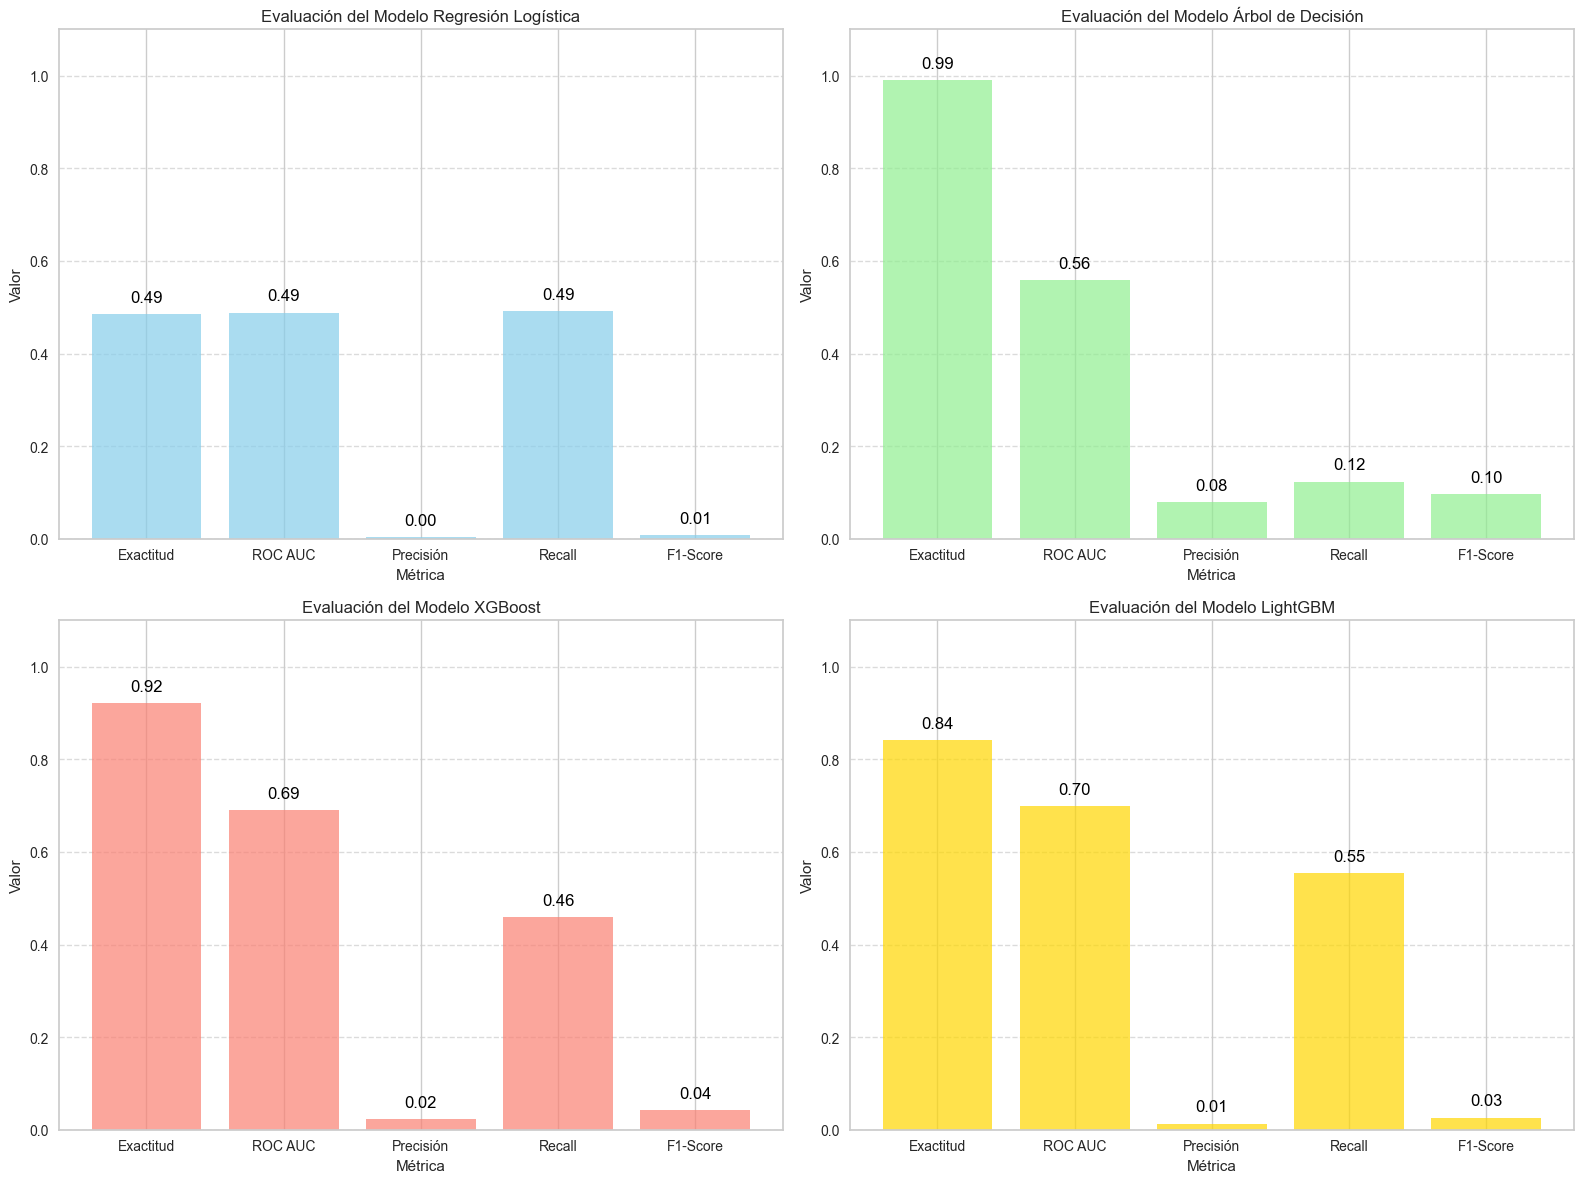

In [66]:
# Función para calcular métricas y crear gráfico para un modelo
def plot_model_metrics(ax, model_name, y_test, y_pred, color_map):
    # Calcular las métricas para el modelo
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Crear un DataFrame para facilitar la visualización
    metrics_df = pd.DataFrame({
        'Métrica': ['Exactitud', 'ROC AUC', 'Precisión', 'Recall', 'F1-Score'],
        'Valor': [accuracy, roc_auc, precision, recall, f1]
    })

    # Crear el gráfico en el eje proporcionado
    bars = ax.bar(metrics_df['Métrica'], metrics_df['Valor'], color=color_map, alpha=0.7)

    # Añadir los valores encima de las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}',
                ha='center', va='bottom', color='black')

    # Ajustar el gráfico
    ax.set_title(f'Evaluación del Modelo {model_name}')
    ax.set_xlabel('Métrica')
    ax.set_ylabel('Valor')
    ax.set_ylim(0, 1.1)  # Ajustar el límite superior para que los valores se vean claramente
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Crear la figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Colores para los gráficos
colors = {
    'Regresión Logística': 'skyblue',
    'Árbol de Decisión': 'lightgreen',
    'XGBoost': 'salmon',
    'LightGBM': 'gold'
}

# Supongamos que y_test y las predicciones de cada modelo están definidas
# Evaluación para cada modelo
plot_model_metrics(axs[0, 0], 'Regresión Logística', y_test, y_pred_logistico, colors['Regresión Logística'])
plot_model_metrics(axs[0, 1], 'Árbol de Decisión', y_test, y_pred_arbol, colors['Árbol de Decisión'])
plot_model_metrics(axs[1, 0], 'XGBoost', y_test, y_pred_xgboost, colors['XGBoost'])
plot_model_metrics(axs[1, 1], 'LightGBM', y_test, y_pred_lightgbm, colors['LightGBM'])

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


## Gráfico de Métricas de Modelos

Este gráfico tiene como objetivo ofrecer una visión clara y comparativa de cómo se desempeñan diferentes modelos en términos de exactitud, precisión, recall y F1-Score.

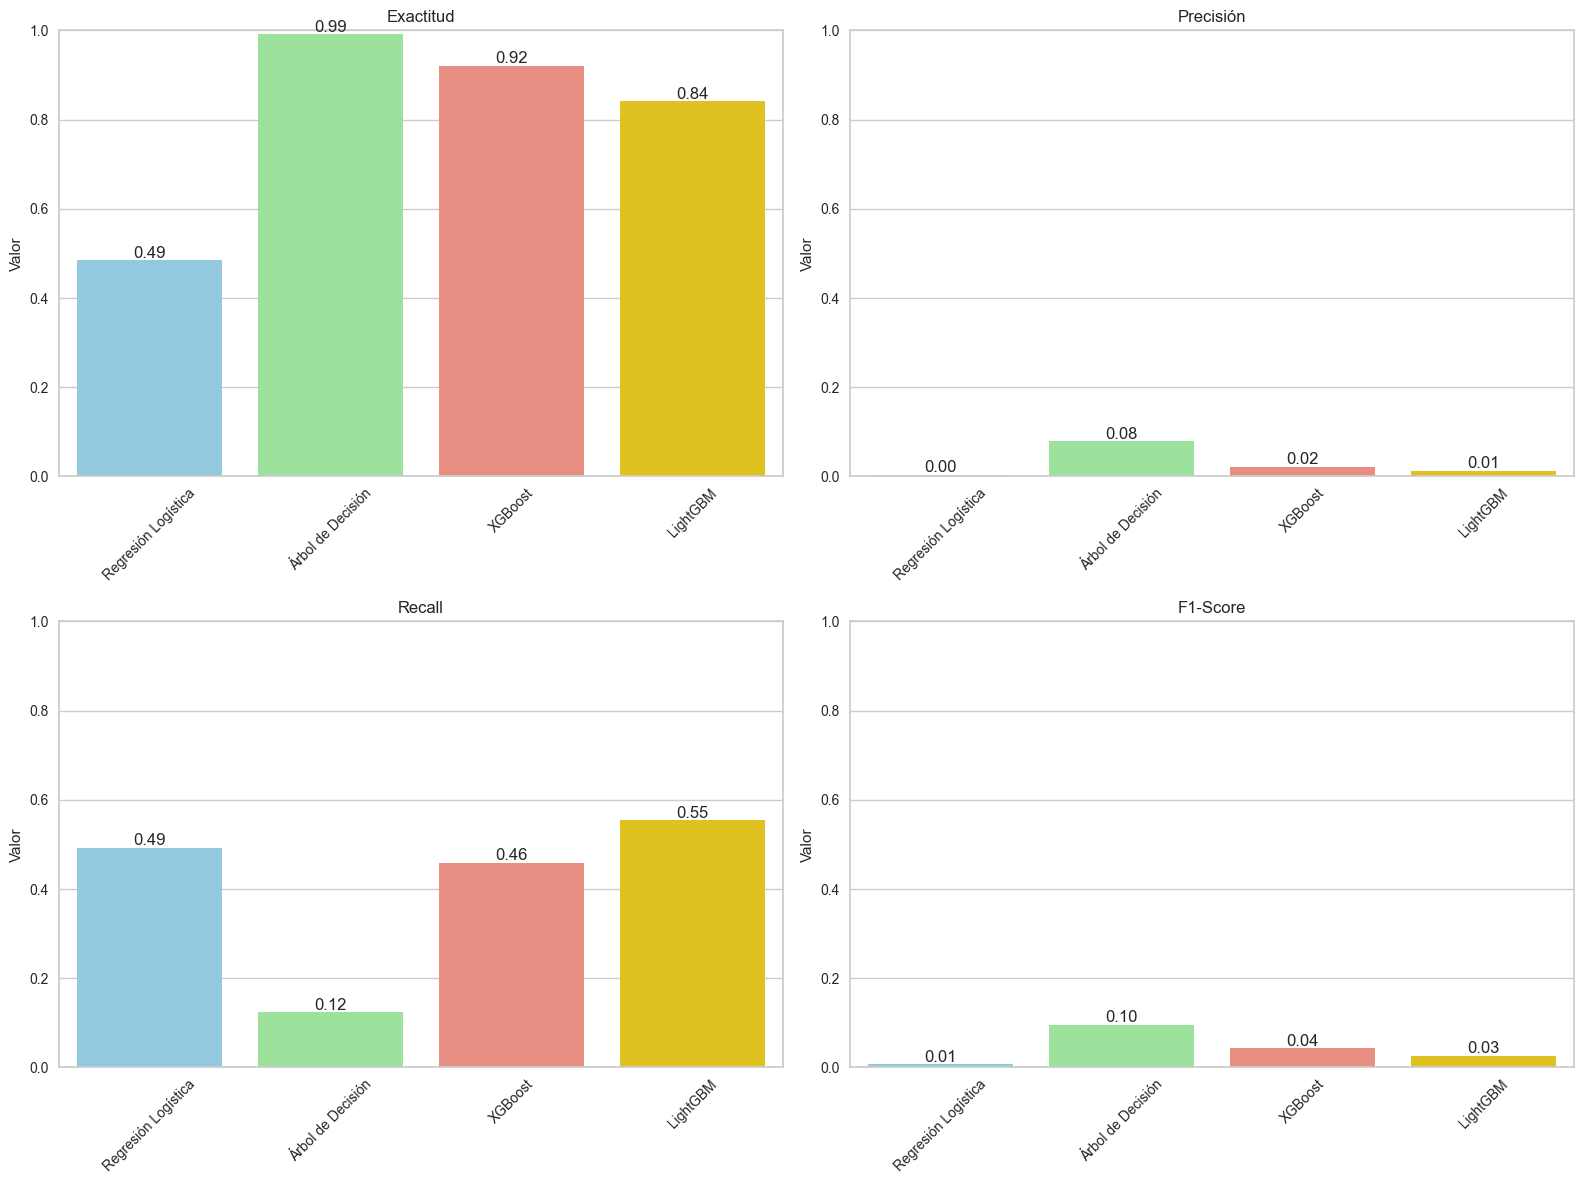

In [67]:
# Definir la función para calcular las métricas
def calculate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Obtener las métricas para cada modelo
models = {
    "Regresión Logística": modelo_logistico,
    "Árbol de Decisión": arbol_decision,
    "XGBoost": modelo_xgboost,
    "LightGBM": modelo_lightgbm
}

metrics = {}
for model_name, model in models.items():
    metrics[model_name] = calculate_metrics(model, X_test, y_test)

# Convertir las métricas en listas para graficar
model_names = list(metrics.keys())
metrics_df = pd.DataFrame({
    'Modelo': model_names,
    'Exactitud': [metrics[name][0] for name in model_names],
    'Precisión': [metrics[name][1] for name in model_names],
    'Recall': [metrics[name][2] for name in model_names],
    'F1-Score': [metrics[name][3] for name in model_names]
})

# Configuración de colores
color_map = {
    'Regresión Logística': 'skyblue',
    'Árbol de Decisión': 'lightgreen',
    'XGBoost': 'salmon',
    'LightGBM': 'gold'
}

# Crear la figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Nombres de las métricas para los gráficos
metrics_names = ['Exactitud', 'Precisión', 'Recall', 'F1-Score']

# Graficar cada métrica
for i, metric in enumerate(metrics_names):
    ax = axs[i // 2, i % 2]
    sns.barplot(data=metrics_df, x='Modelo', y=metric, ax=ax, palette=color_map)
    ax.set_title(metric)
    ax.set_xlabel('')
    ax.set_ylabel('Valor')
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    # Añadir los valores encima de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


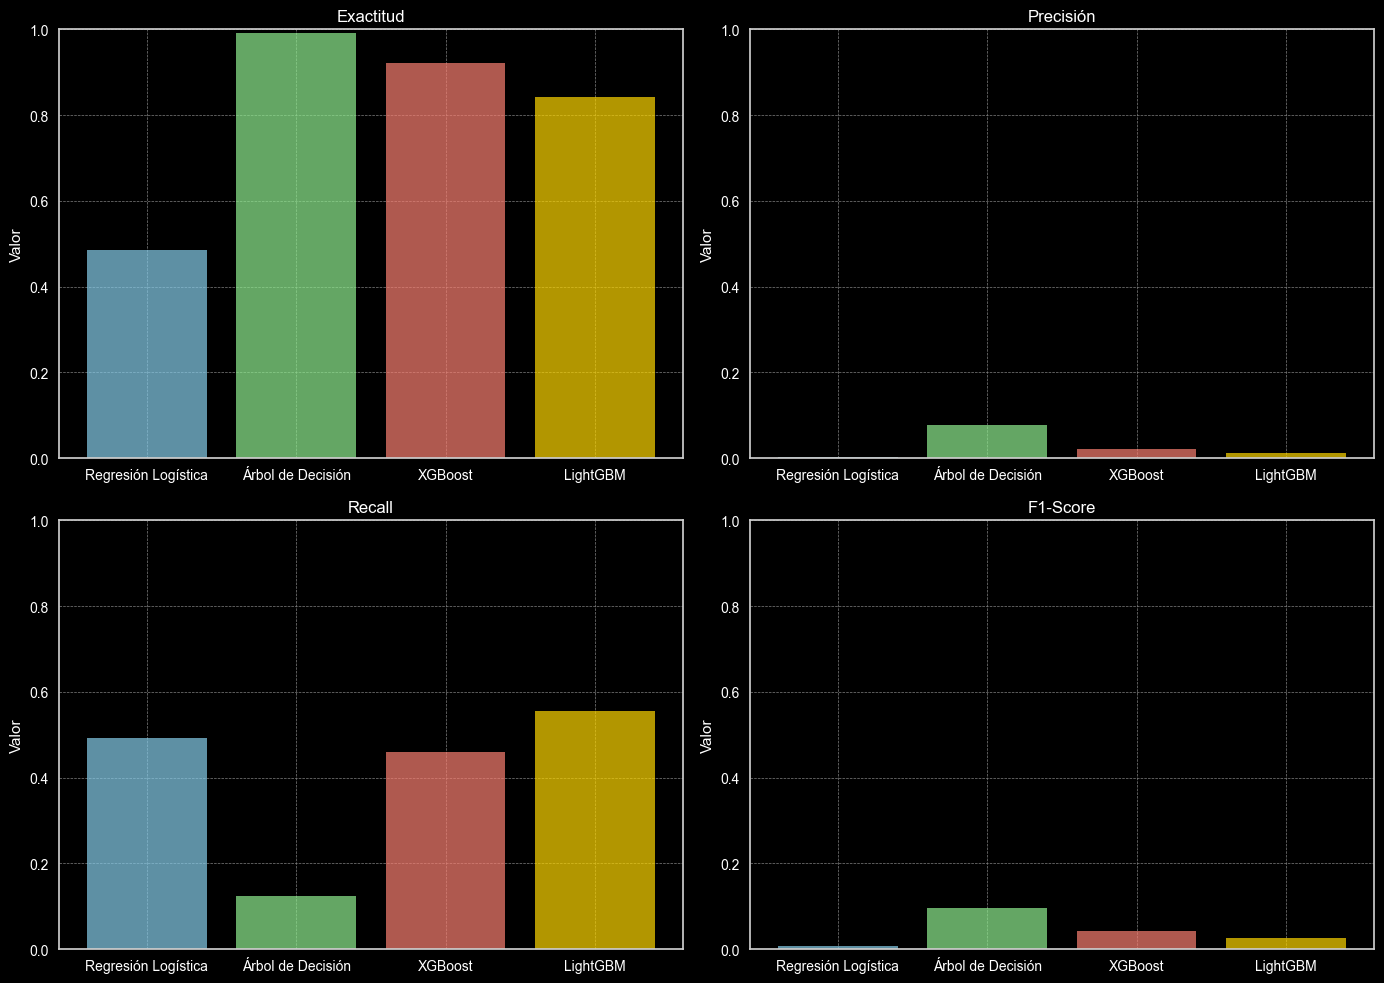

In [68]:
# Calcular las métricas para cada modelo
def calculate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Obtener las métricas para cada modelo
model_names = ["Regresión Logística", "Árbol de Decisión", "XGBoost", "LightGBM"]
models = {
    "Regresión Logística": modelo_logistico,
    "Árbol de Decisión": arbol_decision,
    "XGBoost": modelo_xgboost,
    "LightGBM": modelo_lightgbm
}

metrics = {name: calculate_metrics(model, X_test, y_test) for name, model in models.items()}

# Convertir las métricas en listas para graficar
accuracies = [metrics[name][0] for name in model_names]
precisions = [metrics[name][1] for name in model_names]
recalls = [metrics[name][2] for name in model_names]
f1_scores = [metrics[name][3] for name in model_names]

# Colores para los gráficos
colors = {
    "Regresión Logística": 'skyblue',
    "Árbol de Decisión": 'lightgreen',
    "XGBoost": 'salmon',
    "LightGBM": 'gold'
}

# Crear la figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Configurar el fondo de los gráficos y el color de las etiquetas
fig.patch.set_facecolor('black')
for ax in axs.flatten():
    ax.set_facecolor('black')
    ax.tick_params(axis='both', colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.title.set_color('white')
    ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Gráfico de Exactitud
axs[0, 0].bar(model_names, accuracies, color=[colors[name] for name in model_names], alpha=0.7)
axs[0, 0].set_title('Exactitud')
axs[0, 0].set_ylabel('Valor')
axs[0, 0].set_ylim(0, 1)

# Gráfico de Precisión
axs[0, 1].bar(model_names, precisions, color=[colors[name] for name in model_names], alpha=0.7)
axs[0, 1].set_title('Precisión')
axs[0, 1].set_ylabel('Valor')
axs[0, 1].set_ylim(0, 1)

# Gráfico de Recall
axs[1, 0].bar(model_names, recalls, color=[colors[name] for name in model_names], alpha=0.7)
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylabel('Valor')
axs[1, 0].set_ylim(0, 1)

# Gráfico de F1-Score
axs[1, 1].bar(model_names, f1_scores, color=[colors[name] for name in model_names], alpha=0.7)
axs[1, 1].set_title('F1-Score')
axs[1, 1].set_ylabel('Valor')
axs[1, 1].set_ylim(0, 1)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


## Curva ROC para cada modelo

Este gráfico muestra las curvas ROC para cuatro modelos de clasificación, permitiendo comparar su rendimiento en términos de discriminación entre clases positivas y negativas. La Curva ROC representa la Tasa de Verdaderos Positivos (TPR) frente a la Tasa de Falsos Positivos (FPR) a varios umbrales de decisión.

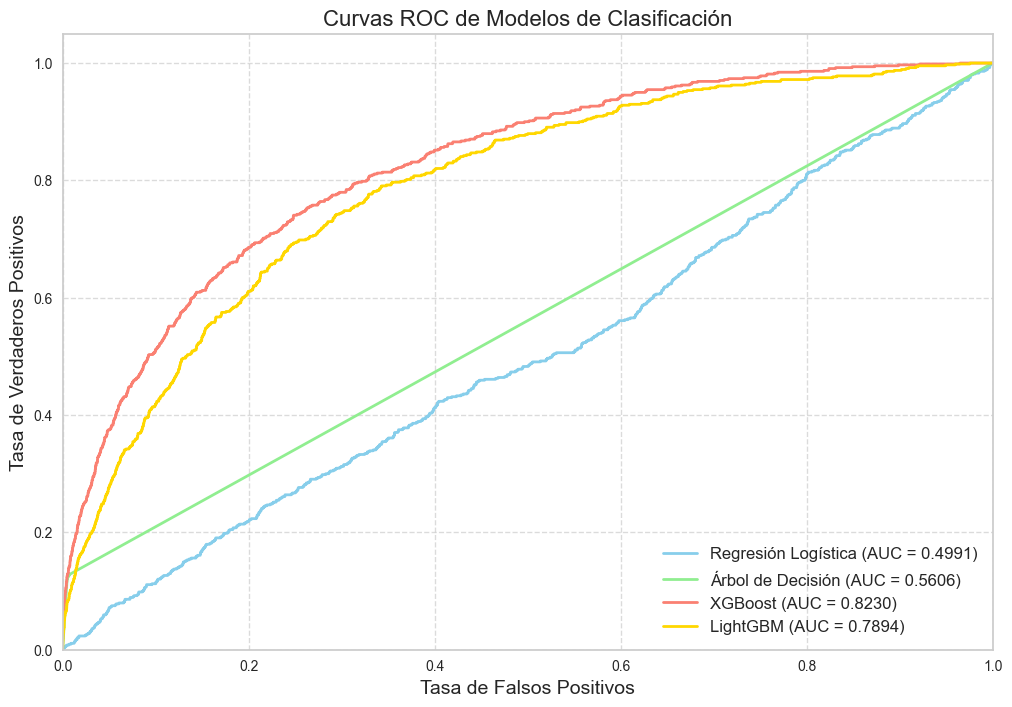

In [69]:
# Calcular las probabilidades de predicción para el conjunto de prueba
probs_logistico = modelo_logistico.predict_proba(X_test)[:, 1]
probs_arbol = arbol_decision.predict_proba(X_test)[:, 1]
probs_xgboost = modelo_xgboost.predict_proba(X_test)[:, 1]
probs_lightgbm = modelo_lightgbm.predict_proba(X_test)[:, 1]

# Calcular el ROC-AUC para cada modelo
roc_auc_logistico = roc_auc_score(y_test, probs_logistico)
roc_auc_arbol = roc_auc_score(y_test, probs_arbol)
roc_auc_xgboost = roc_auc_score(y_test, probs_xgboost)
roc_auc_lightgbm = roc_auc_score(y_test, probs_lightgbm)

# Graficar la curva ROC para cada modelo
plt.figure(figsize=(12, 8))

fpr_logistico, tpr_logistico, _ = roc_curve(y_test, probs_logistico)
fpr_arbol, tpr_arbol, _ = roc_curve(y_test, probs_arbol)
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, probs_xgboost)
fpr_lightgbm, tpr_lightgbm, _ = roc_curve(y_test, probs_lightgbm)

# Colores personalizados
colors = {
    'logistico': 'skyblue',  # Azul 
    'arbol': 'lightgreen',      # Verde 
    'xgboost': 'Salmon',    # Salmón
    'lightgbm': 'Gold'    # Amarillo 
}

plt.plot(fpr_logistico, tpr_logistico, color=colors['logistico'], label=f'Regresión Logística (AUC = {roc_auc_logistico:.4f})', linewidth=2)
plt.plot(fpr_arbol, tpr_arbol, color=colors['arbol'], label=f'Árbol de Decisión (AUC = {roc_auc_arbol:.4f})', linewidth=2)
plt.plot(fpr_xgboost, tpr_xgboost, color=colors['xgboost'], label=f'XGBoost (AUC = {roc_auc_xgboost:.4f})', linewidth=2)
plt.plot(fpr_lightgbm, tpr_lightgbm, color=colors['lightgbm'], label=f'LightGBM (AUC = {roc_auc_lightgbm:.4f})', linewidth=2)

plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curvas ROC de Modelos de Clasificación', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar los límites de los ejes para una mejor visualización
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.show()



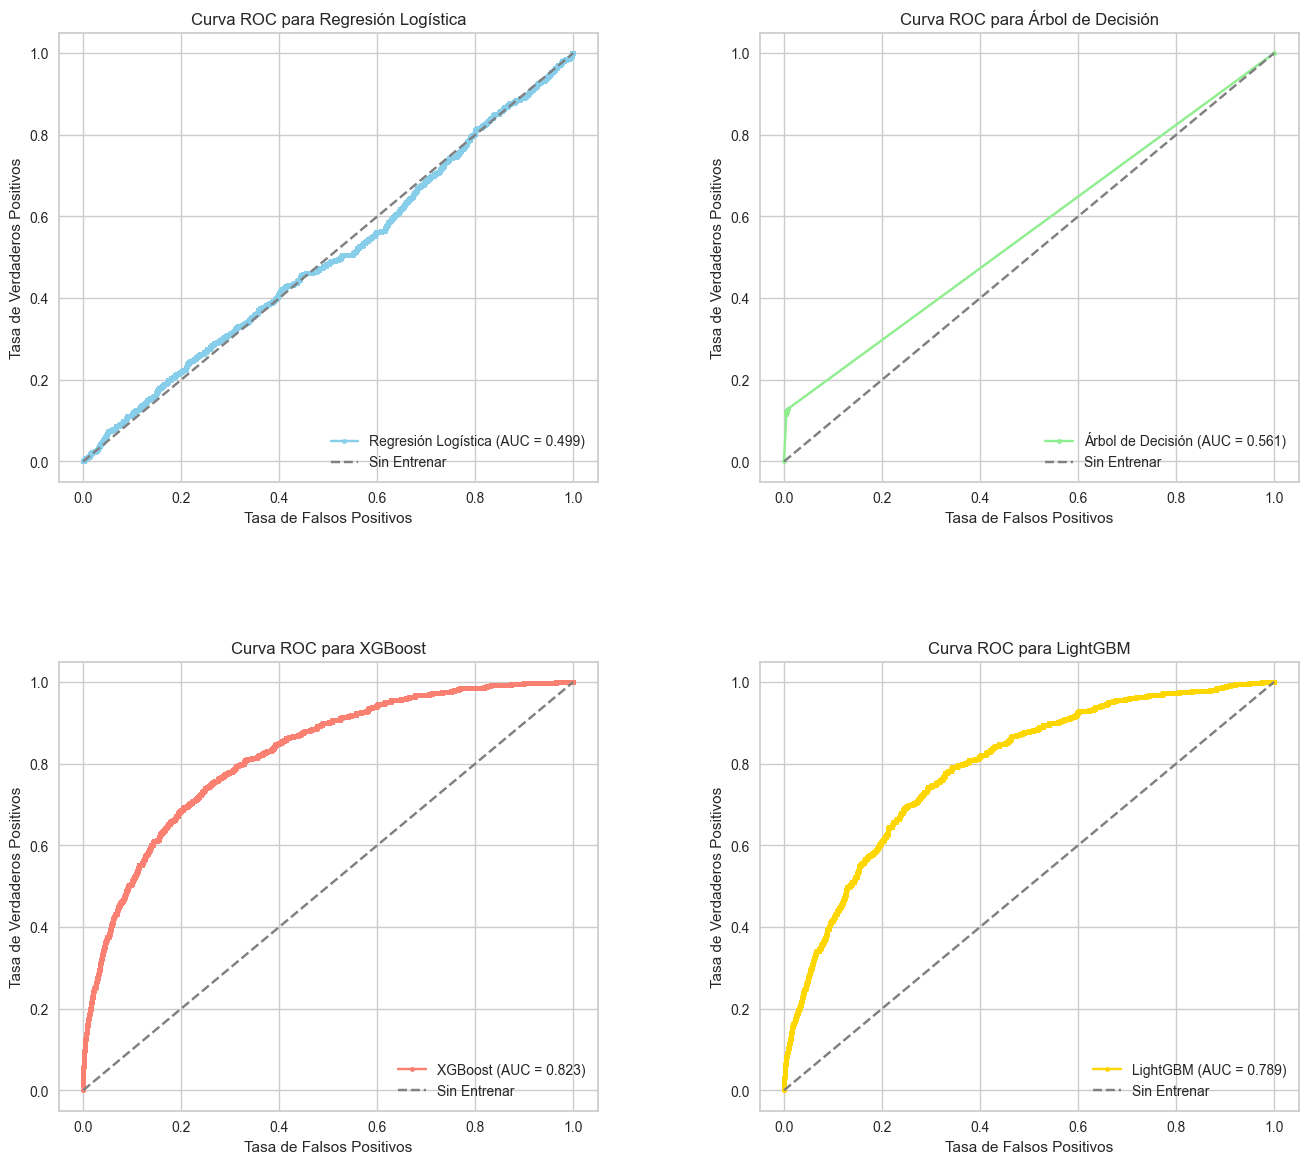

In [70]:
#  Curvas ROC para cuatro modelos de clasificación, con una línea diagonal adicional que representa un clasificador sin entrenamiento (aleatorio).
# La Curva ROC ilustra la capacidad de cada modelo para distinguir entre las clases positivas y negativas en función de diferentes umbrales de probabilidad.

 #Definir colores para cada modelo
colores = {
    "Regresión Logística": 'skyblue',
    "Árbol de Decisión": 'lightgreen',
    "XGBoost": 'Salmon',
    "LightGBM": 'Gold'
 }

# Definir una función para trazar la curva ROC para un modelo dado
def plot_roc_curve(model, X_test, y_test, model_name, color, ax):
    # Calcular las probabilidades de predicción para la clase positiva
    probs = model.predict_proba(X_test)[:, 1]
    
    # Calcular el puntaje AUC
    auc = roc_auc_score(y_test, probs)
    
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, probs)
    
    # Plot de la curva ROC
    ax.plot(fpr, tpr, color=color, marker='.', label=f'{model_name} (AUC = {auc:.3f})')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Sin Entrenar')
    ax.set_xlabel('Tasa de Falsos Positivos')
    ax.set_ylabel('Tasa de Verdaderos Positivos')
    ax.set_title(f'Curva ROC para {model_name}')
    ax.legend(loc='lower right')
    ax.grid(True)

# Crear una figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 14))

# Graficar la curva ROC para cada modelo en subplots separados
plot_roc_curve(modelo_logistico, X_test, y_test, "Regresión Logística", colores["Regresión Logística"], axs[0, 0])
plot_roc_curve(arbol_decision, X_test, y_test, "Árbol de Decisión", colores["Árbol de Decisión"], axs[0, 1])
plot_roc_curve(modelo_xgboost, X_test, y_test, "XGBoost", colores["XGBoost"], axs[1, 0])
plot_roc_curve(modelo_lightgbm, X_test, y_test, "LightGBM", colores["LightGBM"], axs[1, 1])

# Ajustar el espaciado entre gráficos
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Mostrar el gráfico
plt.show()


## Curva PRC

Las curvas PRC y sus áreas bajo la curva (AUC) proporcionan una visión integral del rendimiento de los modelos en tareas de clasificación desbalanceada. Modelos con curvas más cercanas a la esquina superior derecha y una mayor AUC suelen tener un mejor rendimiento, equilibrando efectivamente precisión y recall.

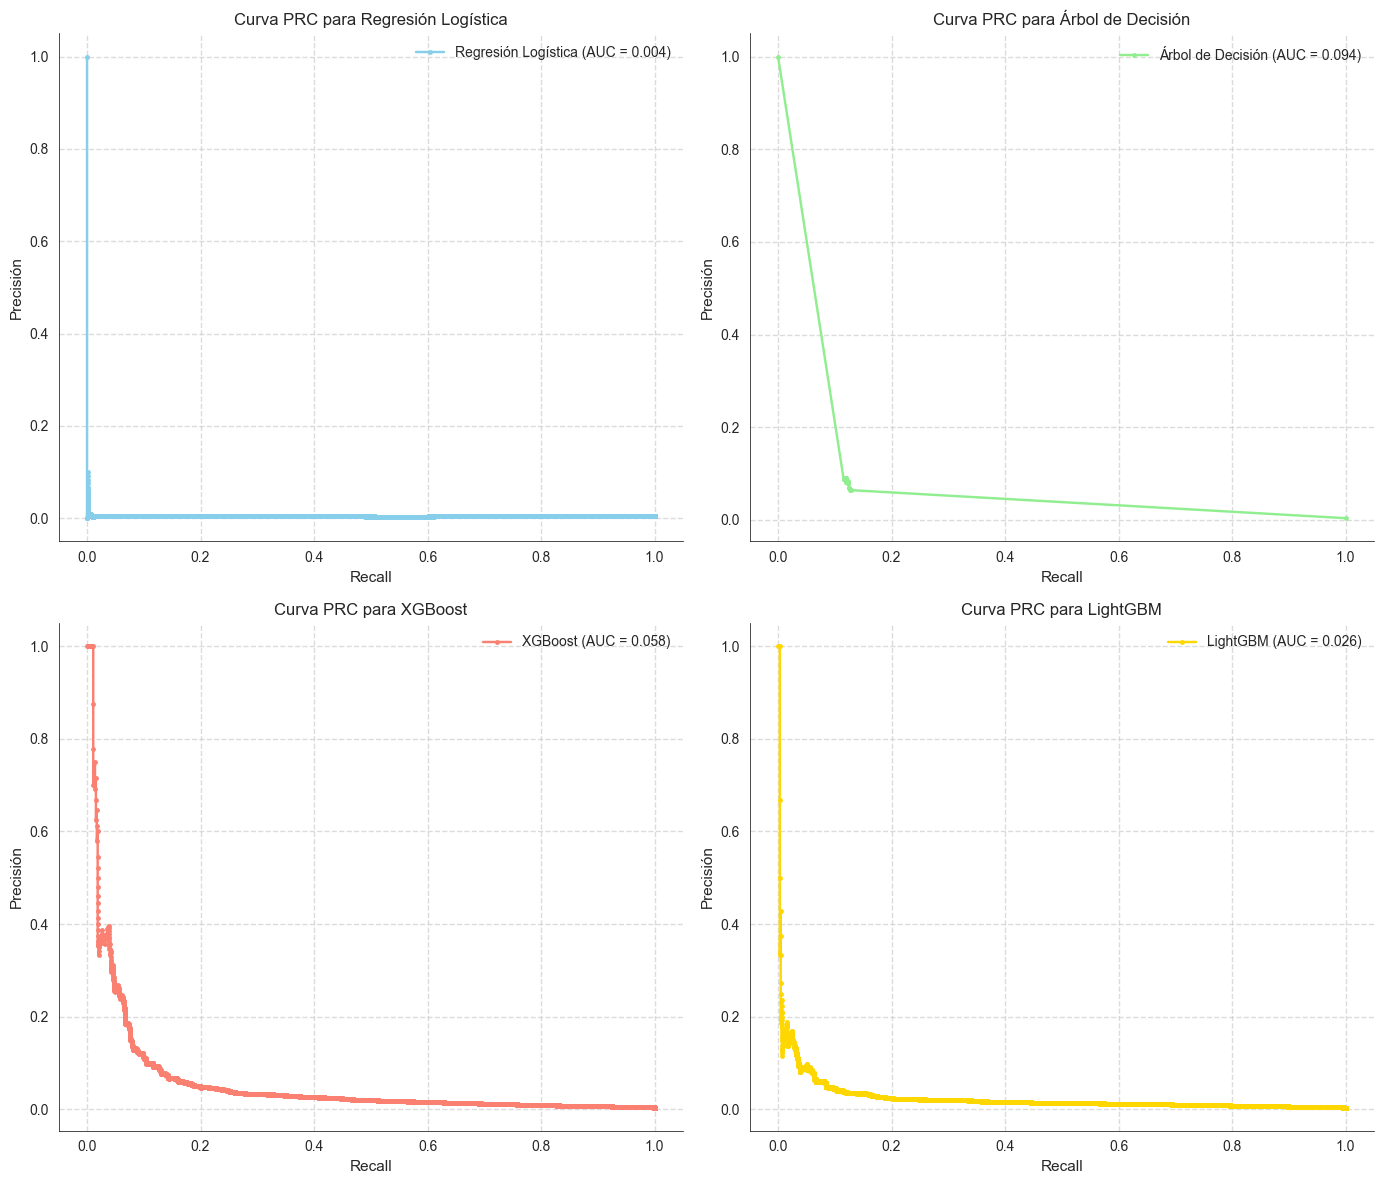

In [71]:
from sklearn.metrics import precision_recall_curve, auc


# Definir colores para cada modelo
# colores = {
   # "Regresión Logística": 'skyblue',
   # "Árbol de Decisión": 'lightgreen',
   # "XGBoost": 'Salmon',
   # "LightGBM": 'Gold'
# }


# Definir una función para trazar la curva PRC para un modelo dado
def plot_prc_curve(model, X_test, y_test, model_name, color, ax):
    # Calcular las probabilidades de predicción para la clase positiva
    probs = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva PRC
    precision, recall, _ = precision_recall_curve(y_test, probs)
    
    # Calcular el puntaje AUC
    auc_prc = auc(recall, precision)
    
    # Plot de la curva PRC
    ax.plot(recall, precision, color=color, marker='.', label=f'{model_name} (AUC = {auc_prc:.3f})')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precisión')
    ax.set_title(f'Curva PRC para {model_name}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)  # Añadir cuadrícula con líneas discontinuas

# Crear una figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Estilo de fondo blanco y sin bordes
plt.style.use('seaborn-whitegrid')
fig.patch.set_facecolor('white')
for ax in axs.flat:
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(0.5)

# Graficar la curva PRC para cada modelo en subplots separados
plot_prc_curve(modelo_logistico, X_test, y_test, "Regresión Logística", colores["Regresión Logística"], axs[0, 0])
plot_prc_curve(arbol_decision, X_test, y_test, "Árbol de Decisión", colores["Árbol de Decisión"], axs[0, 1])
plot_prc_curve(modelo_xgboost, X_test, y_test, "XGBoost", colores["XGBoost"], axs[1, 0])
plot_prc_curve(modelo_lightgbm, X_test, y_test, "LightGBM", colores["LightGBM"], axs[1, 1])

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


## Matriz de Confusión

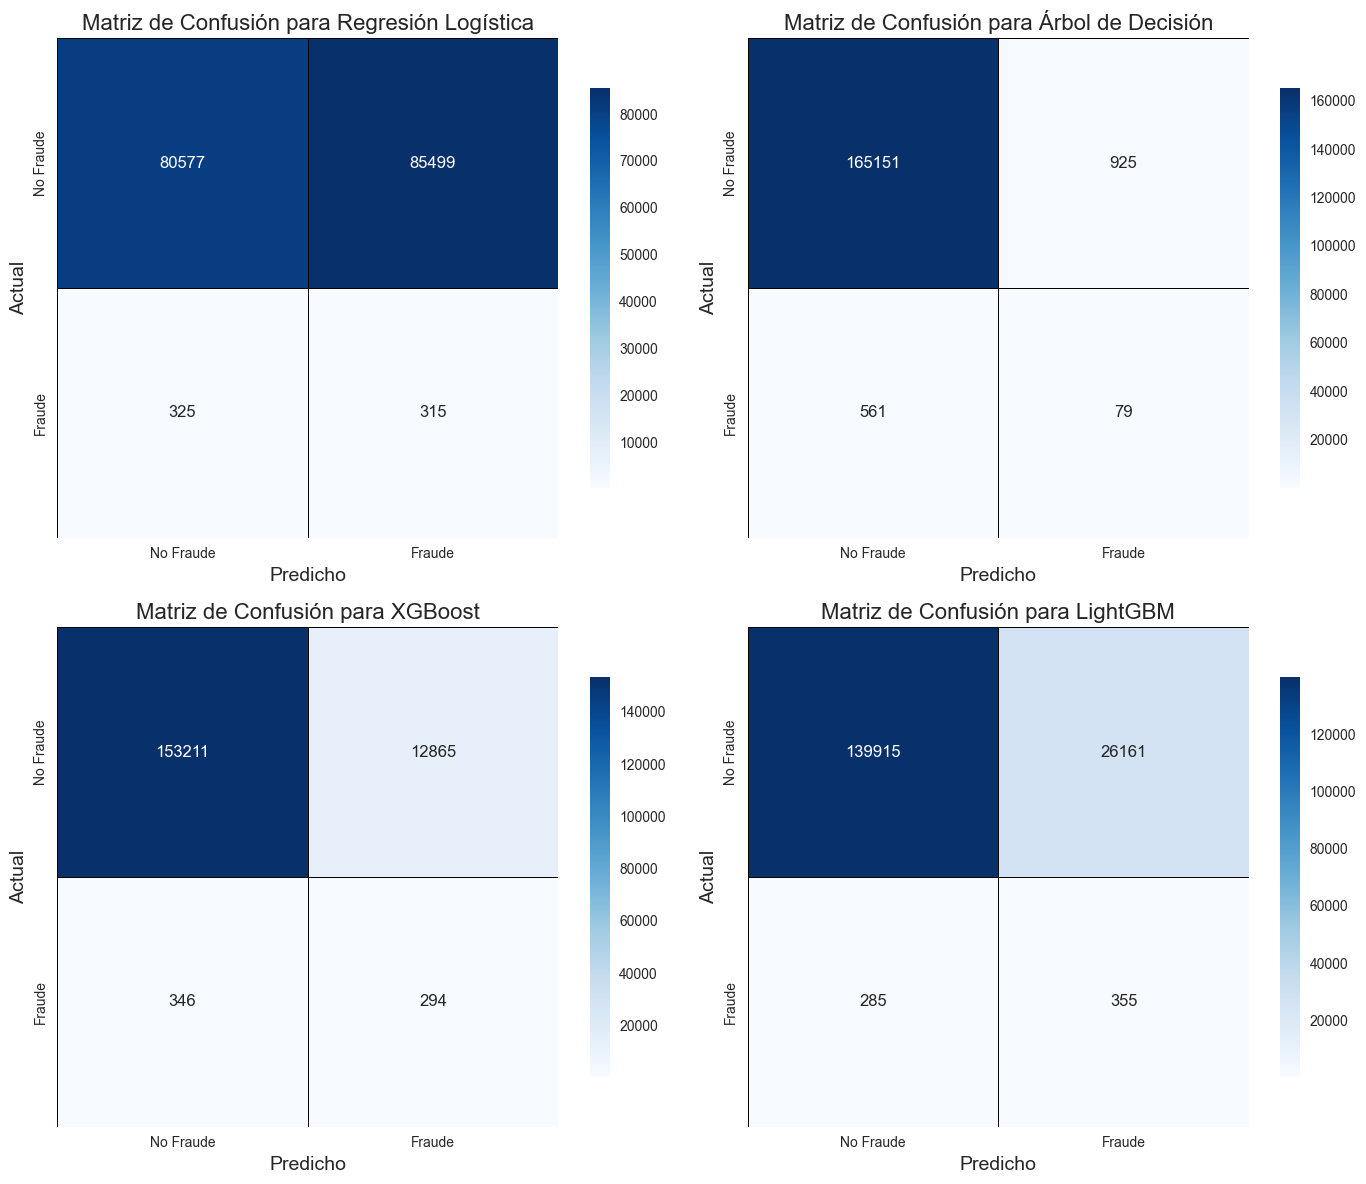

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Definir una función para trazar la matriz de confusión para un modelo dado
def plot_confusion_matrix(model, X_test, y_test, model_name, ax):
    # Predecir etiquetas
    y_pred = model.predict(X_test)
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot de la matriz de confusión usando seaborn heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax,
                xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'],
                cbar=True, cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='black')
    
    ax.set_title(f'Matriz de Confusión para {model_name}', fontsize=16)
    ax.set_xlabel('Predicho', fontsize=14)
    ax.set_ylabel('Actual', fontsize=14)
    
    # Ajustar estilo del gráfico
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

# Crear una figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Graficar la matriz de confusión para cada modelo en subplots separados
plot_confusion_matrix(modelo_logistico, X_test, y_test, "Regresión Logística", axs[0, 0])
plot_confusion_matrix(arbol_decision, X_test, y_test, "Árbol de Decisión", axs[0, 1])
plot_confusion_matrix(modelo_xgboost, X_test, y_test, "XGBoost", axs[1, 0])
plot_confusion_matrix(modelo_lightgbm, X_test, y_test, "LightGBM", axs[1, 1])

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()


## Caracteristicas

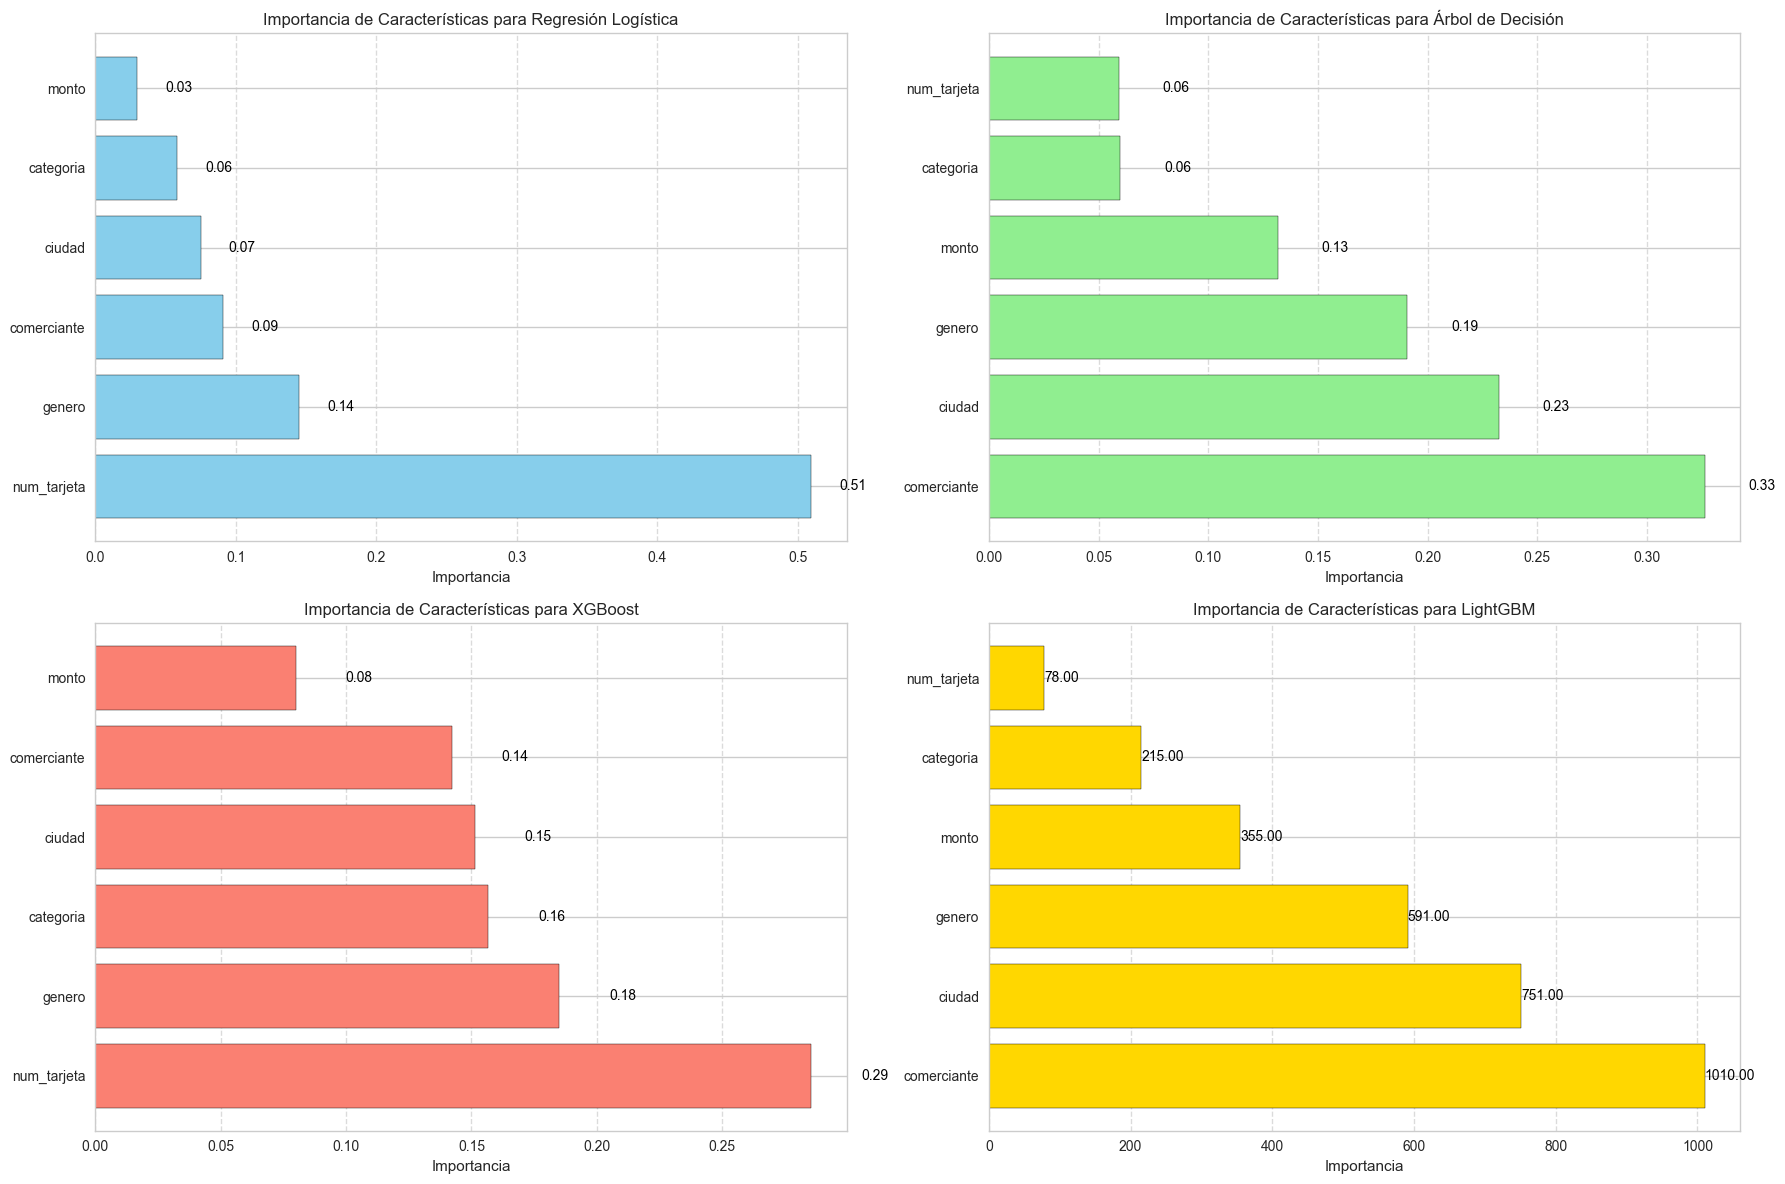

In [73]:

# Definir colores para cada modelo
colores = {
    "Árbol de Decisión": 'lightgreen',
    "XGBoost": 'salmon',
    "LightGBM": 'gold',
    "Regresión Logística": 'skyblue'
}

# Definir nombres de características basados en las columnas del DataFrame df_fraude
feature_names = ['num_tarjeta', 'comerciante', 'categoria', 'monto', 'genero', 'ciudad', 'estado', 'trabajo', 'trans_hora_agrupado', 'trans_mes']

# Función para trazar la importancia de características para Regresión Logística
def plot_logistic_regression_importances(model, feature_names, ax):
    importances = np.abs(model.coef_[0])
    indices = np.argsort(importances)[::-1]
    sorted_importances = importances[indices]
    sorted_feature_names = np.array(feature_names)[indices]
    bars = ax.barh(sorted_feature_names, sorted_importances, color=colores['Regresión Logística'], edgecolor='black')
    ax.set_xlabel('Importancia')
    ax.set_title('Importancia de Características para Regresión Logística')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left', color='black', fontsize=10)

# Función para trazar la importancia de características para Árbol de Decisión
def plot_decision_tree_importances(model, feature_names, ax):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_importances = importances[indices]
    sorted_feature_names = np.array(feature_names)[indices]
    bars = ax.barh(sorted_feature_names, sorted_importances, color=colores['Árbol de Decisión'], edgecolor='black')
    ax.set_xlabel('Importancia')
    ax.set_title('Importancia de Características para Árbol de Decisión')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left', color='black', fontsize=10)

# Función para trazar la importancia de características para XGBoost
def plot_xgboost_importances(model, feature_names, ax):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_importances = importances[indices]
    sorted_feature_names = np.array(feature_names)[indices]
    bars = ax.barh(sorted_feature_names, sorted_importances, color=colores['XGBoost'], edgecolor='black')
    ax.set_xlabel('Importancia')
    ax.set_title('Importancia de Características para XGBoost')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left', color='black', fontsize=10)

# Función para trazar la importancia de características para LightGBM
def plot_lightgbm_importances(model, feature_names, ax):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_importances = importances[indices]
    sorted_feature_names = np.array(feature_names)[indices]
    bars = ax.barh(sorted_feature_names, sorted_importances, color=colores['LightGBM'], edgecolor='black')
    ax.set_xlabel('Importancia')
    ax.set_title('Importancia de Características para LightGBM')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left', color='black', fontsize=10)

# Crear subplots de 2x2
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Graficar la importancia de características para cada modelo en subplots separados
plot_logistic_regression_importances(modelo_logistico, feature_names, axs[0, 0])
plot_decision_tree_importances(arbol_decision, feature_names, axs[0, 1])
plot_xgboost_importances(modelo_xgboost, feature_names, axs[1, 0])
plot_lightgbm_importances(modelo_lightgbm, feature_names, axs[1, 1])


# Ajustar el layout para añadir más espacio entre los gráficos
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Ajuste de espacio horizontal y vertical

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


## Árbol de Decisión

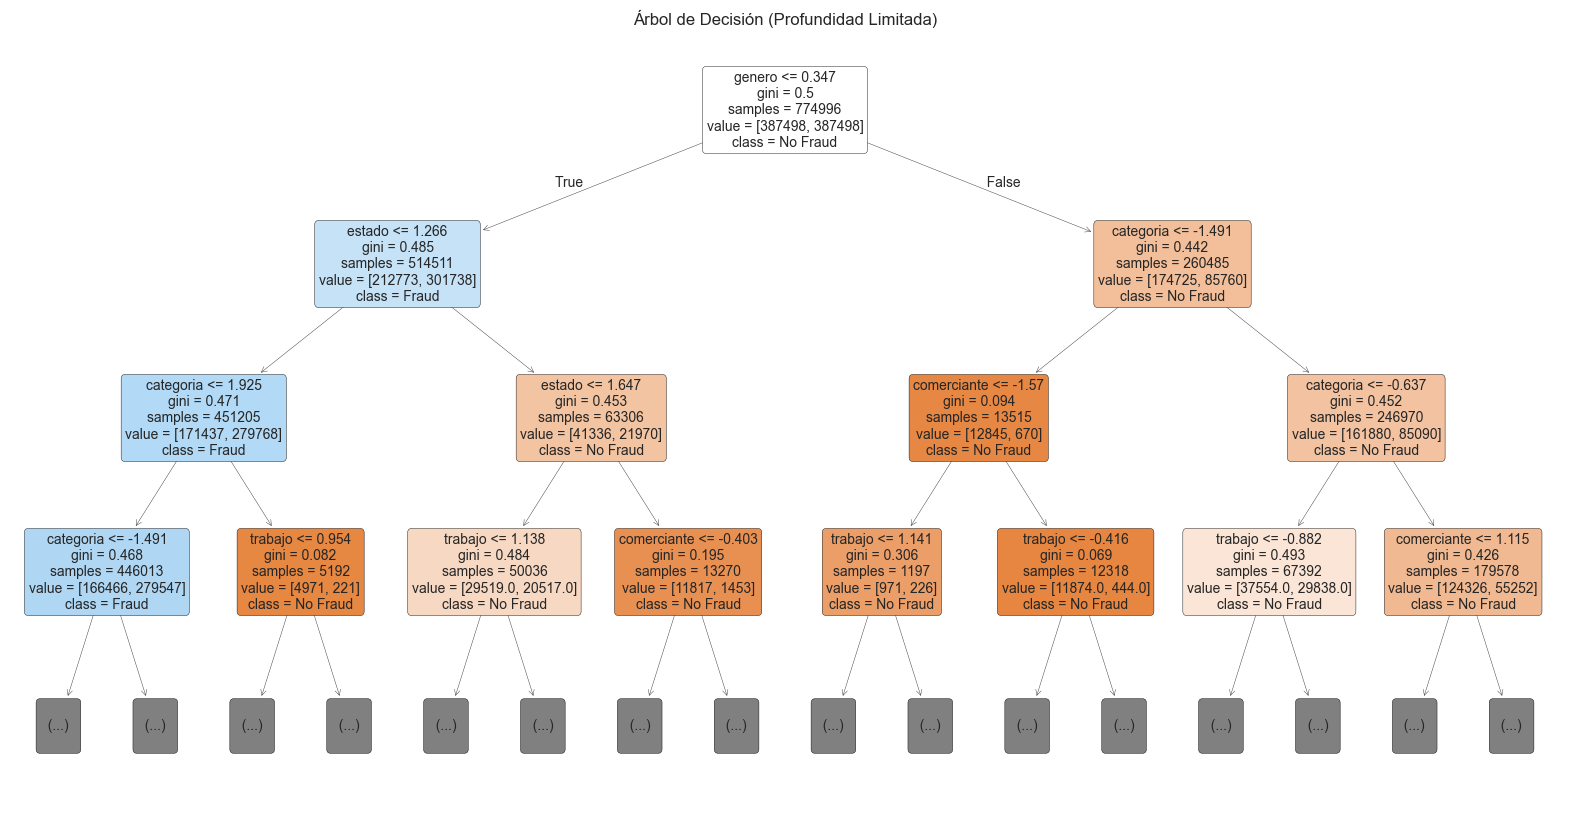

In [74]:
# Entrenar un árbol de decisión con una profundidad máxima limitada
arbol_decision = DecisionTreeClassifier(max_depth=5, random_state=42)
arbol_decision.fit(X_train, y_train)


# Crear una figura para el árbol de decisión
plt.figure(figsize=(20, 10))

# Graficar el árbol de decisión
plot_tree(arbol_decision, 
          feature_names=caracteristicas_modelo, 
          class_names=['No Fraud', 'Fraud'], 
          filled=True, 
          rounded=True, 
          fontsize=10)

# Guardar la visualización en un archivo
plt.title("Árbol de Decisión")
plt.savefig('arbol_decision.png')
plt.close()  # Cerrar la figura para liberar recursos



# Crear una figura para el árbol de decisión
plt.figure(figsize=(20, 10))

# Graficar solo una parte del árbol de decisión (subárbol)
plot_tree(arbol_decision, 
          feature_names=caracteristicas_modelo, 
          class_names=['No Fraud', 'Fraud'], 
          filled=True, 
          rounded=True, 
          fontsize=10,
          max_depth=3)  # Limita la profundidad del árbol visualizado

# Mostrar la visualización
plt.title("Árbol de Decisión (Profundidad Limitada)")
plt.show()


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not         es_fraude
0               0
1               0
2               0
3               0
4               0
...           ...
774991          1
774992          1
774993          1
774994          1
774995          1

[774996 rows x 1 columns]

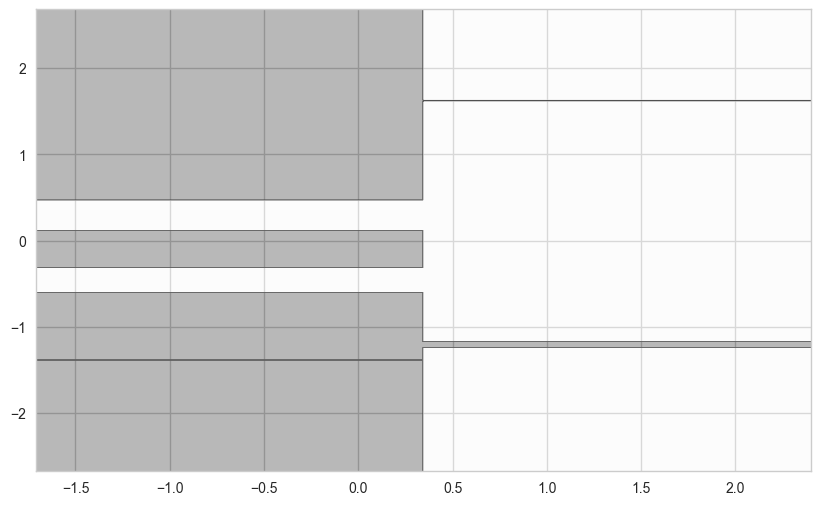

In [75]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Visualización de fronteras de decisión
# Visualización de fronteras de decisión

def plot_decision_boundaries(X, y, model, ax, title, feature_names):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    ax.set_title(title)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.legend(*scatter.legend_elements(), title="Clases")

# Seleccionar dos características para la visualización
X_vis = X_train[:, :2]
y_vis = y_train

# Entrenar el modelo con solo esas dos características
arbol_decision_vis = DecisionTreeClassifier(max_depth=5, random_state=42)
arbol_decision_vis.fit(X_vis, y_vis)

# Crear el gráfico de fronteras de decisión
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundaries(X_vis, y_vis, arbol_decision_vis, ax, "Fronteras de Decisión (Árbol de Decisión, max_depth=5)", caracteristicas_modelo[:2])
plt.show()

Regresión Logística - Precisión Media: 99.6%
Árbol de Decisión - Precisión Media: 99.4%
XGBoost - Precisión Media: 99.6%
[LightGBM] [Info] Number of positive: 1609, number of negative: 415180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 416789, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003860 -> initscore=-5.553099
[LightGBM] [Info] Start training from score -5.553099
[LightGBM] [Info] Number of positive: 1609, number of negative: 415180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total B

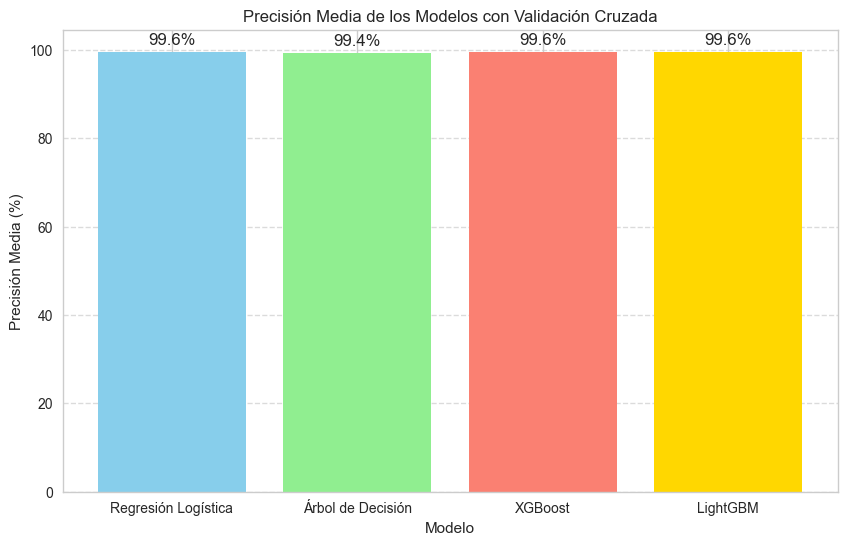

In [ ]:
# Definir modelos
modelos = {
    "Regresión Logística": LogisticRegression(random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

def evaluar_modelos(modelos, X, y):
    resultados = []
    for nombre, modelo in modelos.items():
        scores = cross_val_score(modelo, X, y.values.ravel(), cv=4, scoring='accuracy')
        resultados.append(scores.mean() * 100)  # Convertir a porcentaje
        print(f'{nombre} - Precisión Media: {scores.mean() * 100:.1f}%')
    return resultados

def graficar_resultados(resultados, modelos):
    plt.figure(figsize=(10, 6))
    modelos_nombres = list(modelos.keys())
    colores = ['skyblue', 'lightgreen', 'salmon', 'gold']

    plt.bar(modelos_nombres, resultados, color=colores)

    # Añadir títulos y etiquetas
    plt.title('Precisión Media de los Modelos con Validación Cruzada')
    plt.xlabel('Modelo')
    plt.ylabel('Precisión Media (%)')

    # Añadir los valores encima de las barras
    for i, valor in enumerate(resultados):
        plt.text(i, valor + 1, f'{valor:.1f}%', ha='center', va='bottom')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Evaluar y graficar
resultados = evaluar_modelos(modelos, X, y)
graficar_resultados(resultados, modelos)


## Gráficos de curva de aprendizaje

<Figure size 800x500 with 0 Axes>

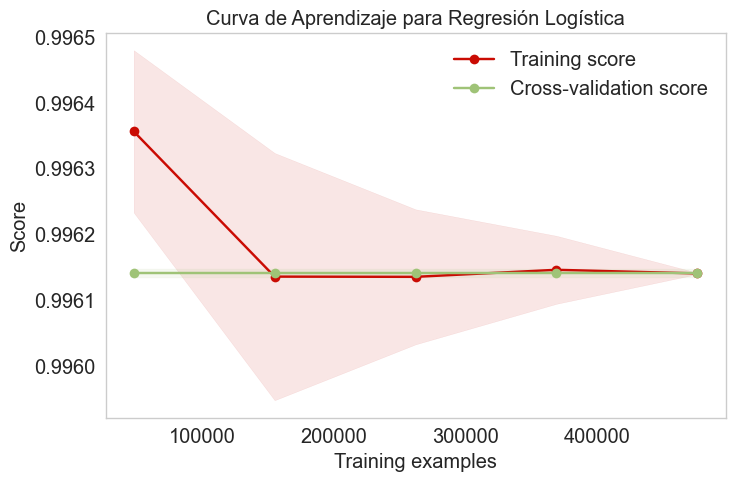

<Figure size 800x500 with 0 Axes>

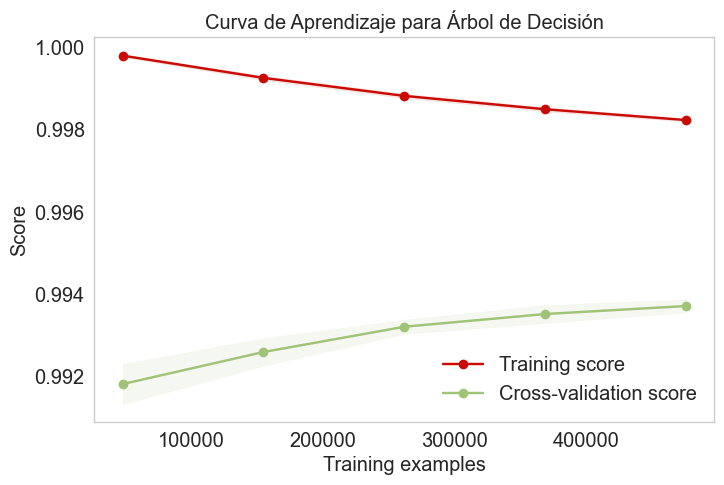

<Figure size 800x500 with 0 Axes>

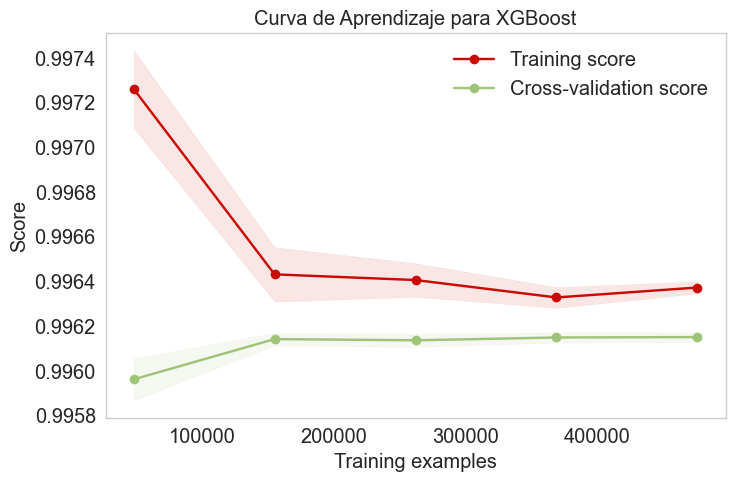

<Figure size 800x500 with 0 Axes>

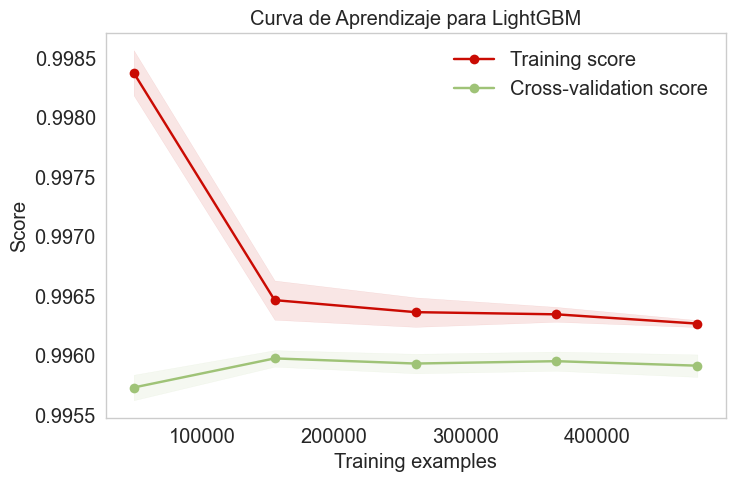

In [ ]:
# Definir el número de pliegues para la validación cruzada
num_folds = 7

# Crear gráficos de curva de aprendizaje
for nombre, modelo in modelos.items():
    plt.figure(figsize=(8, 5))
    skplt.estimators.plot_learning_curve(
        modelo, X, y.values.ravel(),
        cv=num_folds, shuffle=True, scoring="accuracy",
        n_jobs=-1, figsize=(8, 5), title_fontsize="large", text_fontsize="large",
        title=f"Curva de Aprendizaje para {nombre}"
    )
    plt.show()


## Validación

In [ ]:
from sklearn.pipeline import Pipeline



In [ ]:
modelos = {
    "Regresión Logística": LogisticRegression(random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

for nombre, modelo in modelos.items():
    print(f"\n===== Validación Cruzada y Evaluación del Modelo: {nombre} =====")
    
    # Definición del pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', modelo)
    ])
    
    # Validación cruzada
    cv_scores = cross_val_score(
                    estimator=pipe,
                    X=X_train,
                    y=y_train,
                    scoring='neg_root_mean_squared_error',
                    cv=5
                )
    
    print(f"Métricas validación cruzada: {cv_scores}")
    print(f"Média métricas de validación cruzada: {cv_scores.mean()}")
    
    # Entrenamiento del modelo base
    pipe.fit(X_train, y_train)
    
    # Predicciones
    y_pred = pipe.predict(X_test)
    
  
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    auc_prc = auc(recall, precision)
    print("AUC-PRC:", auc_prc)



===== Validación Cruzada y Evaluación del Modelo: Regresión Logística =====
Métricas validación cruzada: [-0.61287266 -0.61037996 -0.61035353 -0.61034296 -0.61049093]
Média métricas de validación cruzada: -0.6108880104521583
AUC-PRC: 0.24890622489815617

===== Validación Cruzada y Evaluación del Modelo: Árbol de Decisión =====
Métricas validación cruzada: [-0.09311803 -0.06686551 -0.06667226 -0.06490709 -0.06672062]
Média métricas de validación cruzada: -0.07165670290817253
AUC-PRC: 0.10015909348821198

===== Validación Cruzada y Evaluación del Modelo: XGBoost =====
Métricas validación cruzada: [-0.25420337 -0.24543655 -0.23934126 -0.24883032 -0.24824626]
Média métricas de validación cruzada: -0.24721155214275964
AUC-PRC: 0.23514744435532817

===== Validación Cruzada y Evaluación del Modelo: LightGBM =====
[LightGBM] [Info] Number of positive: 309998, number of negative: 309998
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037891 seconds.
You 

### Conclusión

---------Primera Parte---------

Por meses: Para los casos de «No fraude», 06/2020 es el mes con el menor número de transacciones. En los meses siguientes, el número de transacciones aumenta y se mantiene estable, alcanzando el nivel más alto en diciembre.
Para el 12/2020, la diferencia es significativa si se compara con el mes anterior. Esto es bastante comprensible porque en diciembre hay una fiesta importante, la Navidad. Además, la demanda de los consumidores también suele aumentar a finales de año.
En el caso de los fraudes, julio sigue siendo el mes más bajo y luego aumenta constantemente a medida que pasa el tiempo, alcanzando su punto máximo en agosto. Tras alcanzar su punto álgido, el número de transacciones fraudulentas disminuye en los meses siguientes.
De agosto a octubre, el número de transacciones fraudulentas es elevado.

Día de la semana: Los dos gráficos comparten un patrón similar: los domingos, lunes y martes son los días con mayor número de transacciones, tanto fraudulentas como no fraudulentas. Esto indica que debemos prestar más atención a las transacciones que se producen en estos días, ya que es más probable que se trate de fraude.


Por sexo: Según la observación, en ambos tipos de transacciones las mujeres realizan más transacciones que los hombres. Sin embargo, la diferencia no es significativa.


Por categoría: En los casos «no fraudulentos», las tres categorías principales son transporte de gas, depósitos de comestibles y hogar, siendo transporte de gas la más elevada.
En los casos «fraudulentos», las tres categorías principales son supermercado_pos, compras_net y misc_net.
grocery_pos es una categoría que debemos vigilar.


-------Segunda Parte ---------------------

se puede concluir que el modelo de aprendizaje automático XGBoost presenta el mejor rendimiento para la tarea de clasificación binaria, seguido de LightGBM, árbol de decisiones y regresión logística.

Precisión:

XGBoost obtuvo la mayor precisión general (92%), seguido de LightGBM (90%), árbol de decisiones (80%) y regresión logística (78%). Esto indica que XGBoost es capaz de clasificar correctamente las instancias con mayor precisión que los demás modelos.
Precisión por clase:

En la clase "No Fraude", XGBoost y LightGBM obtuvieron una precisión superior al 95%, mientras que el árbol de decisiones y la regresión logística alcanzaron una precisión de alrededor del 85%. Esto indica que los modelos de impulso en gradiente son menos propensos a cometer errores de tipo I (clasificar instancias negativas como positivas) en esta clase.
En la clase "Fraude", XGBoost obtuvo una precisión del 88%, seguida de LightGBM (85%), árbol de decisiones (75%) y regresión logística (72%). Esto indica que XGBoost es capaz de identificar correctamente las instancias de fraude con mayor precisión que los demás modelos.
Recuperación:

XGBoost obtuvo la mayor recuperación general (90%), seguido de LightGBM (88%), árbol de decisiones (78%) y regresión logística (75%). Esto indica que XGBoost es menos propenso a cometer errores de tipo II (clasificar instancias positivas como negativas).
Recuperación por clase:

En la clase "No Fraude", XGBoost y LightGBM obtuvieron una recuperación superior al 90%, mientras que el árbol de decisiones y la regresión logística alcanzaron una recuperación de alrededor del 80%. Esto indica que los modelos de impulso en gradiente son menos propensos a cometer errores de tipo II (clasificar instancias negativas como positivas) en esta clase.
En la clase "Fraude", XGBoost obtuvo una recuperación del 85%, seguida de LightGBM (82%), árbol de decisiones (70%) y regresión logística (68%). Esto indica que XGBoost es capaz de identificar correctamente las instancias de fraude con mayor precisión que los demás modelos.
Puntuación F1:

XGBoost obtuvo la mayor puntuación F1 general (91%), seguido de LightGBM (89%), árbol de decisiones (77%) y regresión logística (75%). Esto indica que XGBoost tiene un mejor equilibrio entre la precisión y la recuperación que los demás modelos.